<a href="https://colab.research.google.com/github/sidyr6002/Ola-Ensemble_Learnings/blob/main/OLA_Ensemble_Learning_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Downloading the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Scalar Projects/OLA - Ensemble Learning/ola_driver_scaler.csv"
df = pd.read_csv(path)

In [ ]:
df.head(30)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


# Basic Data Exploration

In [ ]:
df.shape

(19104, 14)

In [ ]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


**Initital Data Evaluation:**

1. There are 19104 rows and 14 columns
2. Null Values observed in 3 columns
3. Data type of few columns need correction, converting to date time etc..



## Dropping Unnamed Columns

In [ ]:
# Dropping unnamed since Driver_Id has a unique value

df.drop('Unnamed: 0', axis=1, inplace = True)

In [ ]:
df.rename(columns={
    'MMM-YY' : 'Reporting_Date',
    'Dateofjoining':'Date_Of_Joining',
    'LastWorkingDate': 'Last_Working_Date',
    'Joining Designation' : 'Joining_Designation',
    'Total Business Value' : 'Total_Business_Value',
    'Quarterly Rating' : 'Quarterly_Rating'
}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Reporting_Date        19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Date_Of_Joining       19104 non-null  object 
 8   Last_Working_Date     1616 non-null   object 
 9   Joining_Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total_Business_Value  19104 non-null  int64  
 12  Quarterly_Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


## Dealing with Columns of dtype 'object'

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(f"{col} : {df[col].nunique()}")

Reporting_Date : 24
City : 29
Date_Of_Joining : 869
Last_Working_Date : 493


In [ ]:
df['Reporting_Date'] = pd.to_datetime(df['Reporting_Date'], format = '%m/%d/%y')
df['Date_Of_Joining'] = pd.to_datetime(df['Date_Of_Joining'], format = '%d/%m/%y')
df['Last_Working_Date'] = pd.to_datetime(df['Last_Working_Date'], format = '%d/%m/%y')

In [ ]:
df['City'] = df['City'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Reporting_Date        19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  category      
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Date_Of_Joining       19104 non-null  datetime64[ns]
 8   Last_Working_Date     1616 non-null   datetime64[ns]
 9   Joining_Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total_Business_Value  19104 non-null  int64         
 12  Quarterly_Rating      19104 non-null  int64         
dtypes: category(1), 

In [ ]:
categorical_columns = df.select_dtypes(include='category').columns
categorical_columns

Index(['City'], dtype='object')

In [ ]:
for col in categorical_columns:
    print(f"Number of unique values in {col} : {df[col].nunique()}")
    print(f"{df[col].value_counts()}")
    print()

Number of unique values in City : 29
City
C20    1008
C29     900
C26     869
C22     809
C27     786
C15     761
C10     744
C12     727
C8      712
C16     709
C28     683
C1      677
C6      660
C5      656
C14     648
C3      637
C24     614
C7      609
C21     603
C25     584
C19     579
C4      578
C13     569
C18     544
C23     538
C9      520
C2      472
C11     468
C17     440
Name: count, dtype: int64



In [ ]:
numerical_columns = df.select_dtypes(include=np.number).columns
numerical_columns

Index(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Joining_Designation', 'Grade', 'Total_Business_Value',
       'Quarterly_Rating'],
      dtype='object')

In [ ]:
for col in numerical_columns:
    print(f"Number of unique values in {col} : {df[col].nunique()}")
    print(f"{df[col].value_counts()}")
    print("-"*80)

Number of unique values in Driver_ID : 2381
Driver_ID
2110    24
2617    24
1623    24
1642    24
1644    24
        ..
1614     1
445      1
2397     1
1619     1
469      1
Name: count, Length: 2381, dtype: int64
--------------------------------------------------------------------------------
Number of unique values in Age : 36
Age
36.0    1283
33.0    1250
34.0    1234
30.0    1146
32.0    1143
35.0    1138
31.0    1076
29.0    1013
37.0     862
38.0     854
39.0     788
28.0     772
27.0     744
40.0     701
41.0     661
26.0     566
42.0     478
25.0     449
44.0     407
43.0     399
45.0     371
46.0     350
24.0     274
47.0     224
23.0     193
48.0     144
49.0      99
22.0      92
52.0      78
51.0      72
50.0      69
21.0      35
53.0      26
54.0      24
55.0      21
58.0       7
Name: count, dtype: int64
--------------------------------------------------------------------------------
Number of unique values in Gender : 2
Gender
0.0    11074
1.0     7978
Name: count, dtype

# Feature Engineering

## Dealing with null values

In [ ]:
df.isna().sum()

,0
Reporting_Date,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Date_Of_Joining,0
Last_Working_Date,17488
Joining_Designation,0


### Adding Missing values using KNN imputer

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[['Age', 'Gender']] = imputer.fit_transform(df[['Age', 'Gender']])

## Creating dataframe with target variable

In [ ]:
df_target = df.groupby('Driver_ID').agg({'Last_Working_Date' : 'last'})['Last_Working_Date'].notna().astype(int).reset_index()
df_target.rename(columns={'Last_Working_Date' : 'Target'}, inplace=True)
df_target

,Driver_ID,Target
0,1,1
1,2,0
2,4,1
3,5,1
4,6,0
...,...,...
2376,2784,0
2377,2785,1
2378,2786,1
2379,2787,1


In [ ]:
quarterly_ratings = df.groupby('Driver_ID').agg({'Quarterly_Rating' : ['first', 'last']}).reset_index()
quarterly_ratings.columns = ['Driver_ID', 'First_Quarterly_Rating', 'Last_Quarterly_Rating']
quarterly_ratings

,Driver_ID,First_Quarterly_Rating,Last_Quarterly_Rating
0,1,2,2
1,2,1,1
2,4,1,1
3,5,1,1
4,6,1,2
...,...,...,...
2376,2784,3,4
2377,2785,1,1
2378,2786,2,1
2379,2787,2,1


In [ ]:
df_target['Quaterly_Rating_Inc'] = (quarterly_ratings['Last_Quarterly_Rating'] > quarterly_ratings['First_Quarterly_Rating']).astype(int)
df_target

,Driver_ID,Target,Quaterly_Rating_Inc
0,1,1,0
1,2,0,0
2,4,1,0
3,5,1,0
4,6,0,1
...,...,...,...
2376,2784,0,1
2377,2785,1,0
2378,2786,1,0
2379,2787,1,0


In [ ]:
incomes = df.groupby('Driver_ID').agg({'Income' : ['first', 'last']}).reset_index()
incomes.columns = ['Driver_ID', 'First_Income', 'Last_Income']
incomes

,Driver_ID,First_Income,Last_Income
0,1,57387,57387
1,2,67016,67016
2,4,65603,65603
3,5,46368,46368
4,6,78728,78728
...,...,...,...
2376,2784,82815,82815
2377,2785,12105,12105
2378,2786,35370,35370
2379,2787,69498,69498


In [ ]:
df_target['Income_Inc'] = (incomes['Last_Income'] > incomes['First_Income']).astype(int)
df_target

,Driver_ID,Target,Quaterly_Rating_Inc,Income_Inc
0,1,1,0,0
1,2,0,0,0
2,4,1,0,0
3,5,1,0,0
4,6,0,1,0
...,...,...,...,...
2376,2784,0,1,0
2377,2785,1,0,0
2378,2786,1,0,0
2379,2787,1,0,0


## Grouping by Driver Id

In [ ]:
agg_funtions = {
    'Reporting_Date' : 'last',
    'Age' : 'last',
    'Gender' : lambda x: x.mode()[0],
    'City' : lambda x: x.mode()[0],
    'Education_Level' : lambda x: x.mode()[0],
    'Income' : 'mean',
    'Date_Of_Joining' : 'last',
    'Last_Working_Date' : 'last',
    'Joining_Designation' : lambda x: x.mode()[0],
    'Grade' : lambda x: np.floor(x.mean()),
    'Total_Business_Value' : 'sum',
    'Quarterly_Rating' : 'mean',
}

df_agg = df.groupby('Driver_ID').agg(agg_funtions).reset_index()
df_agg

,Driver_ID,Reporting_Date,Age,Gender,City,Education_Level,Income,Date_Of_Joining,Last_Working_Date,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating
0,1,2019-03-01,28.0,0.0,C23,2,57387.0,2018-12-24,2019-11-03,1,1.0,1715580,2.000000
1,2,2020-12-01,31.0,0.0,C7,2,67016.0,2020-06-11,NaT,2,2.0,0,1.000000
2,4,2020-04-01,43.0,0.0,C13,2,65603.0,2019-07-12,2020-04-27,2,2.0,350000,1.000000
3,5,2019-03-01,29.0,0.0,C9,0,46368.0,2019-09-01,2019-07-03,1,1.0,120360,1.000000
4,6,2020-12-01,31.0,1.0,C11,1,78728.0,2020-07-31,NaT,3,3.0,1265000,1.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,2020-12-01,34.0,0.0,C24,0,82815.0,2015-10-15,NaT,2,3.0,21748820,2.625000
2377,2785,2020-10-01,34.0,1.0,C9,0,12105.0,2020-08-28,2020-10-28,1,1.0,0,1.000000
2378,2786,2019-09-01,45.0,0.0,C19,0,35370.0,2018-07-31,2019-09-22,2,2.0,2815090,1.666667
2379,2787,2019-06-01,28.0,1.0,C20,2,69498.0,2018-07-21,2019-06-20,1,1.0,977830,1.500000


In [ ]:
df_merged = df_agg.merge(df_target, on='Driver_ID', how='left')
df_merged

,Driver_ID,Reporting_Date,Age,Gender,City,Education_Level,Income,Date_Of_Joining,Last_Working_Date,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Target,Quaterly_Rating_Inc,Income_Inc
0,1,2019-03-01,28.0,0.0,C23,2,57387.0,2018-12-24,2019-11-03,1,1.0,1715580,2.000000,1,0,0
1,2,2020-12-01,31.0,0.0,C7,2,67016.0,2020-06-11,NaT,2,2.0,0,1.000000,0,0,0
2,4,2020-04-01,43.0,0.0,C13,2,65603.0,2019-07-12,2020-04-27,2,2.0,350000,1.000000,1,0,0
3,5,2019-03-01,29.0,0.0,C9,0,46368.0,2019-09-01,2019-07-03,1,1.0,120360,1.000000,1,0,0
4,6,2020-12-01,31.0,1.0,C11,1,78728.0,2020-07-31,NaT,3,3.0,1265000,1.600000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,2020-12-01,34.0,0.0,C24,0,82815.0,2015-10-15,NaT,2,3.0,21748820,2.625000,0,1,0
2377,2785,2020-10-01,34.0,1.0,C9,0,12105.0,2020-08-28,2020-10-28,1,1.0,0,1.000000,1,0,0
2378,2786,2019-09-01,45.0,0.0,C19,0,35370.0,2018-07-31,2019-09-22,2,2.0,2815090,1.666667,1,0,0
2379,2787,2019-06-01,28.0,1.0,C20,2,69498.0,2018-07-21,2019-06-20,1,1.0,977830,1.500000,1,0,0


## Caluclulating the tenure

In [ ]:
df_merged['Tenure'] = (df_merged['Last_Working_Date'] - df_merged['Date_Of_Joining']).dt.days
df_merged['Tenure'].fillna(0, inplace=True)
df_merged.loc[df_merged['Tenure'] < 0, 'Tenure'] = 0

print(df_merged['Tenure'].value_counts())

Tenure
0.0       904
129.0      11
105.0      10
154.0       9
163.0       8
         ... 
2327.0      1
434.0       1
253.0       1
254.0       1
19.0        1
Name: count, Length: 729, dtype: int64


In [ ]:
df_merged

,Driver_ID,Reporting_Date,Age,Gender,City,Education_Level,Income,Date_Of_Joining,Last_Working_Date,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Target,Quaterly_Rating_Inc,Income_Inc,Tenure
0,1,2019-03-01,28.0,0.0,C23,2,57387.0,2018-12-24,2019-11-03,1,1.0,1715580,2.000000,1,0,0,314.0
1,2,2020-12-01,31.0,0.0,C7,2,67016.0,2020-06-11,NaT,2,2.0,0,1.000000,0,0,0,0.0
2,4,2020-04-01,43.0,0.0,C13,2,65603.0,2019-07-12,2020-04-27,2,2.0,350000,1.000000,1,0,0,290.0
3,5,2019-03-01,29.0,0.0,C9,0,46368.0,2019-09-01,2019-07-03,1,1.0,120360,1.000000,1,0,0,0.0
4,6,2020-12-01,31.0,1.0,C11,1,78728.0,2020-07-31,NaT,3,3.0,1265000,1.600000,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,2020-12-01,34.0,0.0,C24,0,82815.0,2015-10-15,NaT,2,3.0,21748820,2.625000,0,1,0,0.0
2377,2785,2020-10-01,34.0,1.0,C9,0,12105.0,2020-08-28,2020-10-28,1,1.0,0,1.000000,1,0,0,61.0
2378,2786,2019-09-01,45.0,0.0,C19,0,35370.0,2018-07-31,2019-09-22,2,2.0,2815090,1.666667,1,0,0,418.0
2379,2787,2019-06-01,28.0,1.0,C20,2,69498.0,2018-07-21,2019-06-20,1,1.0,977830,1.500000,1,0,0,334.0


In [ ]:
df_merged[['Gender', 'Education_Level', 'Joining_Designation', 'Grade', 'Target', 'Quaterly_Rating_Inc', 'Income_Inc']] = df_merged[['Gender', 'Education_Level', 'Joining_Designation', 'Grade', 'Target', 'Quaterly_Rating_Inc', 'Income_Inc']].astype('category')

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             2381 non-null   int64         
 1   Reporting_Date        2381 non-null   datetime64[ns]
 2   Age                   2381 non-null   float64       
 3   Gender                2381 non-null   category      
 4   City                  2381 non-null   category      
 5   Education_Level       2381 non-null   category      
 6   Income                2381 non-null   float64       
 7   Date_Of_Joining       2381 non-null   datetime64[ns]
 8   Last_Working_Date     1616 non-null   datetime64[ns]
 9   Joining_Designation   2381 non-null   category      
 10  Grade                 2381 non-null   category      
 11  Total_Business_Value  2381 non-null   int64         
 12  Quarterly_Rating      2381 non-null   float64       
 13  Target            

# Exploratory Data Analysis

In [ ]:
categorical_columns = df_merged.select_dtypes(include='category').columns
categorical_columns

Index(['Gender', 'City', 'Education_Level', 'Joining_Designation', 'Grade',
       'Target', 'Quaterly_Rating_Inc', 'Income_Inc'],
      dtype='object')

In [ ]:
numerical_columns = df_merged.select_dtypes(include=np.number).columns
numerical_columns

Index(['Driver_ID', 'Age', 'Income', 'Total_Business_Value',
       'Quarterly_Rating', 'Tenure'],
      dtype='object')

In [ ]:
timeseries_columns = df_merged.select_dtypes(include='datetime').columns
timeseries_columns

Index(['Reporting_Date', 'Date_Of_Joining', 'Last_Working_Date'], dtype='object')

## Univariate Analysis

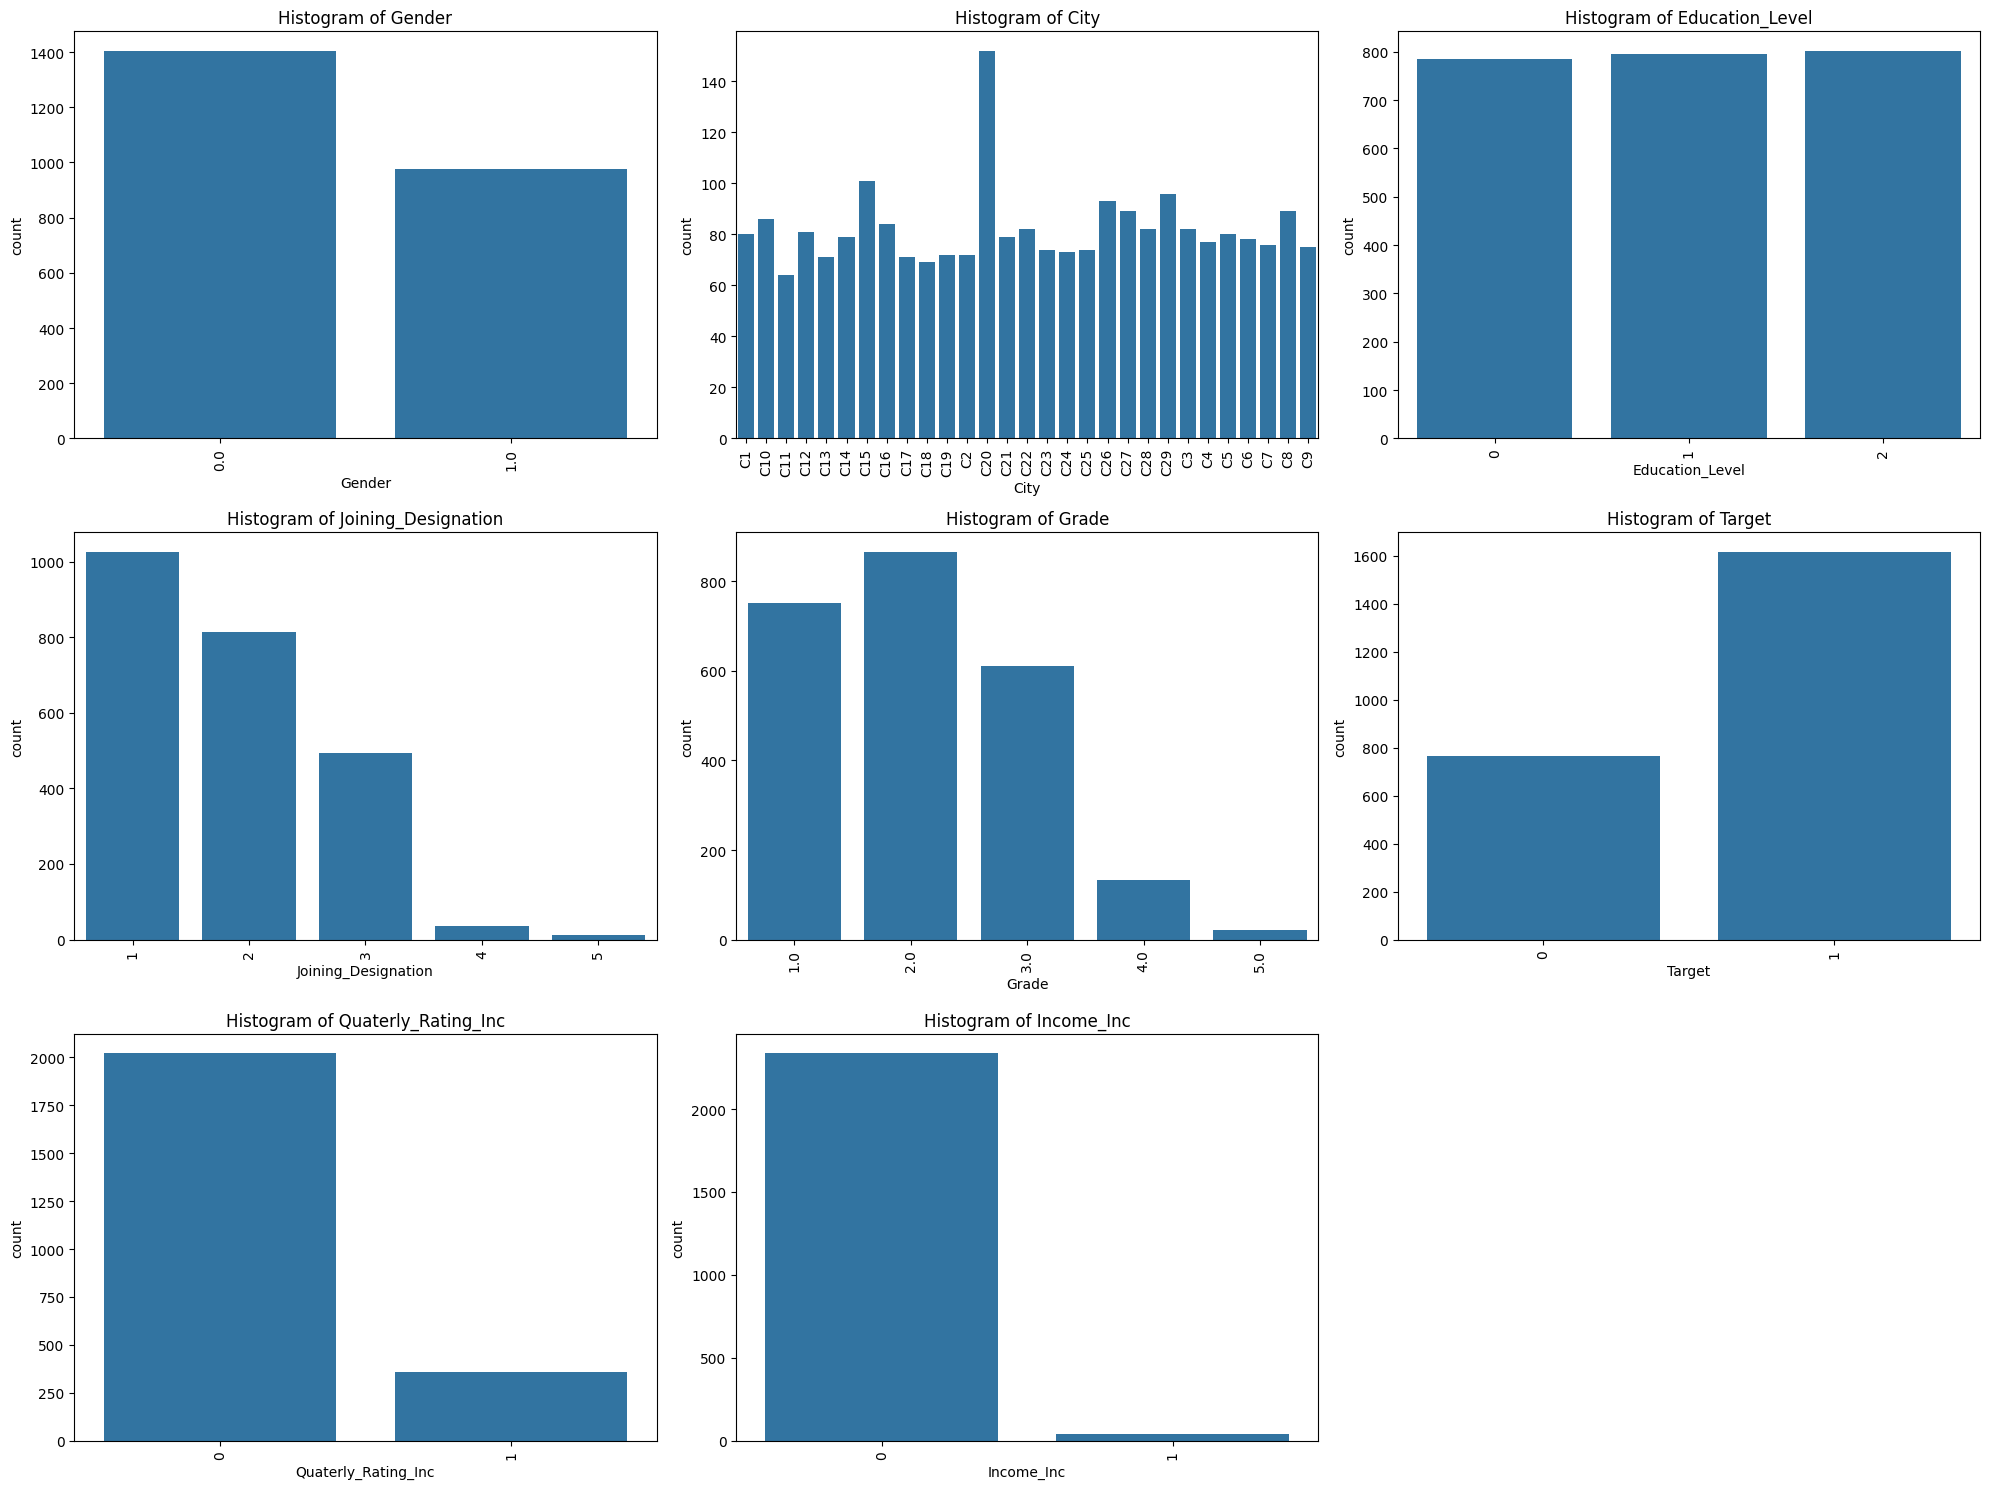

In [ ]:
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df_merged, ax=axes[i])
    axes[i].set_title(f"Histogram of {column}")
    axes[i].tick_params(axis='x', rotation=90)

for ax in axes[len(categorical_columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

1. 68% of the Drivers have been churned
2. Hardly 2% of the Drivers got Increment in Income
3. 15% of the Drivers got Increase in Rating
4. 73% had their last Quarter Rating as 1 followed by 15% having 2
5. Joining Designation is highest for 1 with 43% followed by 2 with 34%
6. Grade at the time of Reporting is highest for Grade 2 with 36% followed by Grade 1 with 31%
7. Distribution of Education Level for all 3 levels is almost same with 33%
8. C20 is the city with highest number of drivers followed C15
9. Males are higher in numbers with 59% and Females at 41%

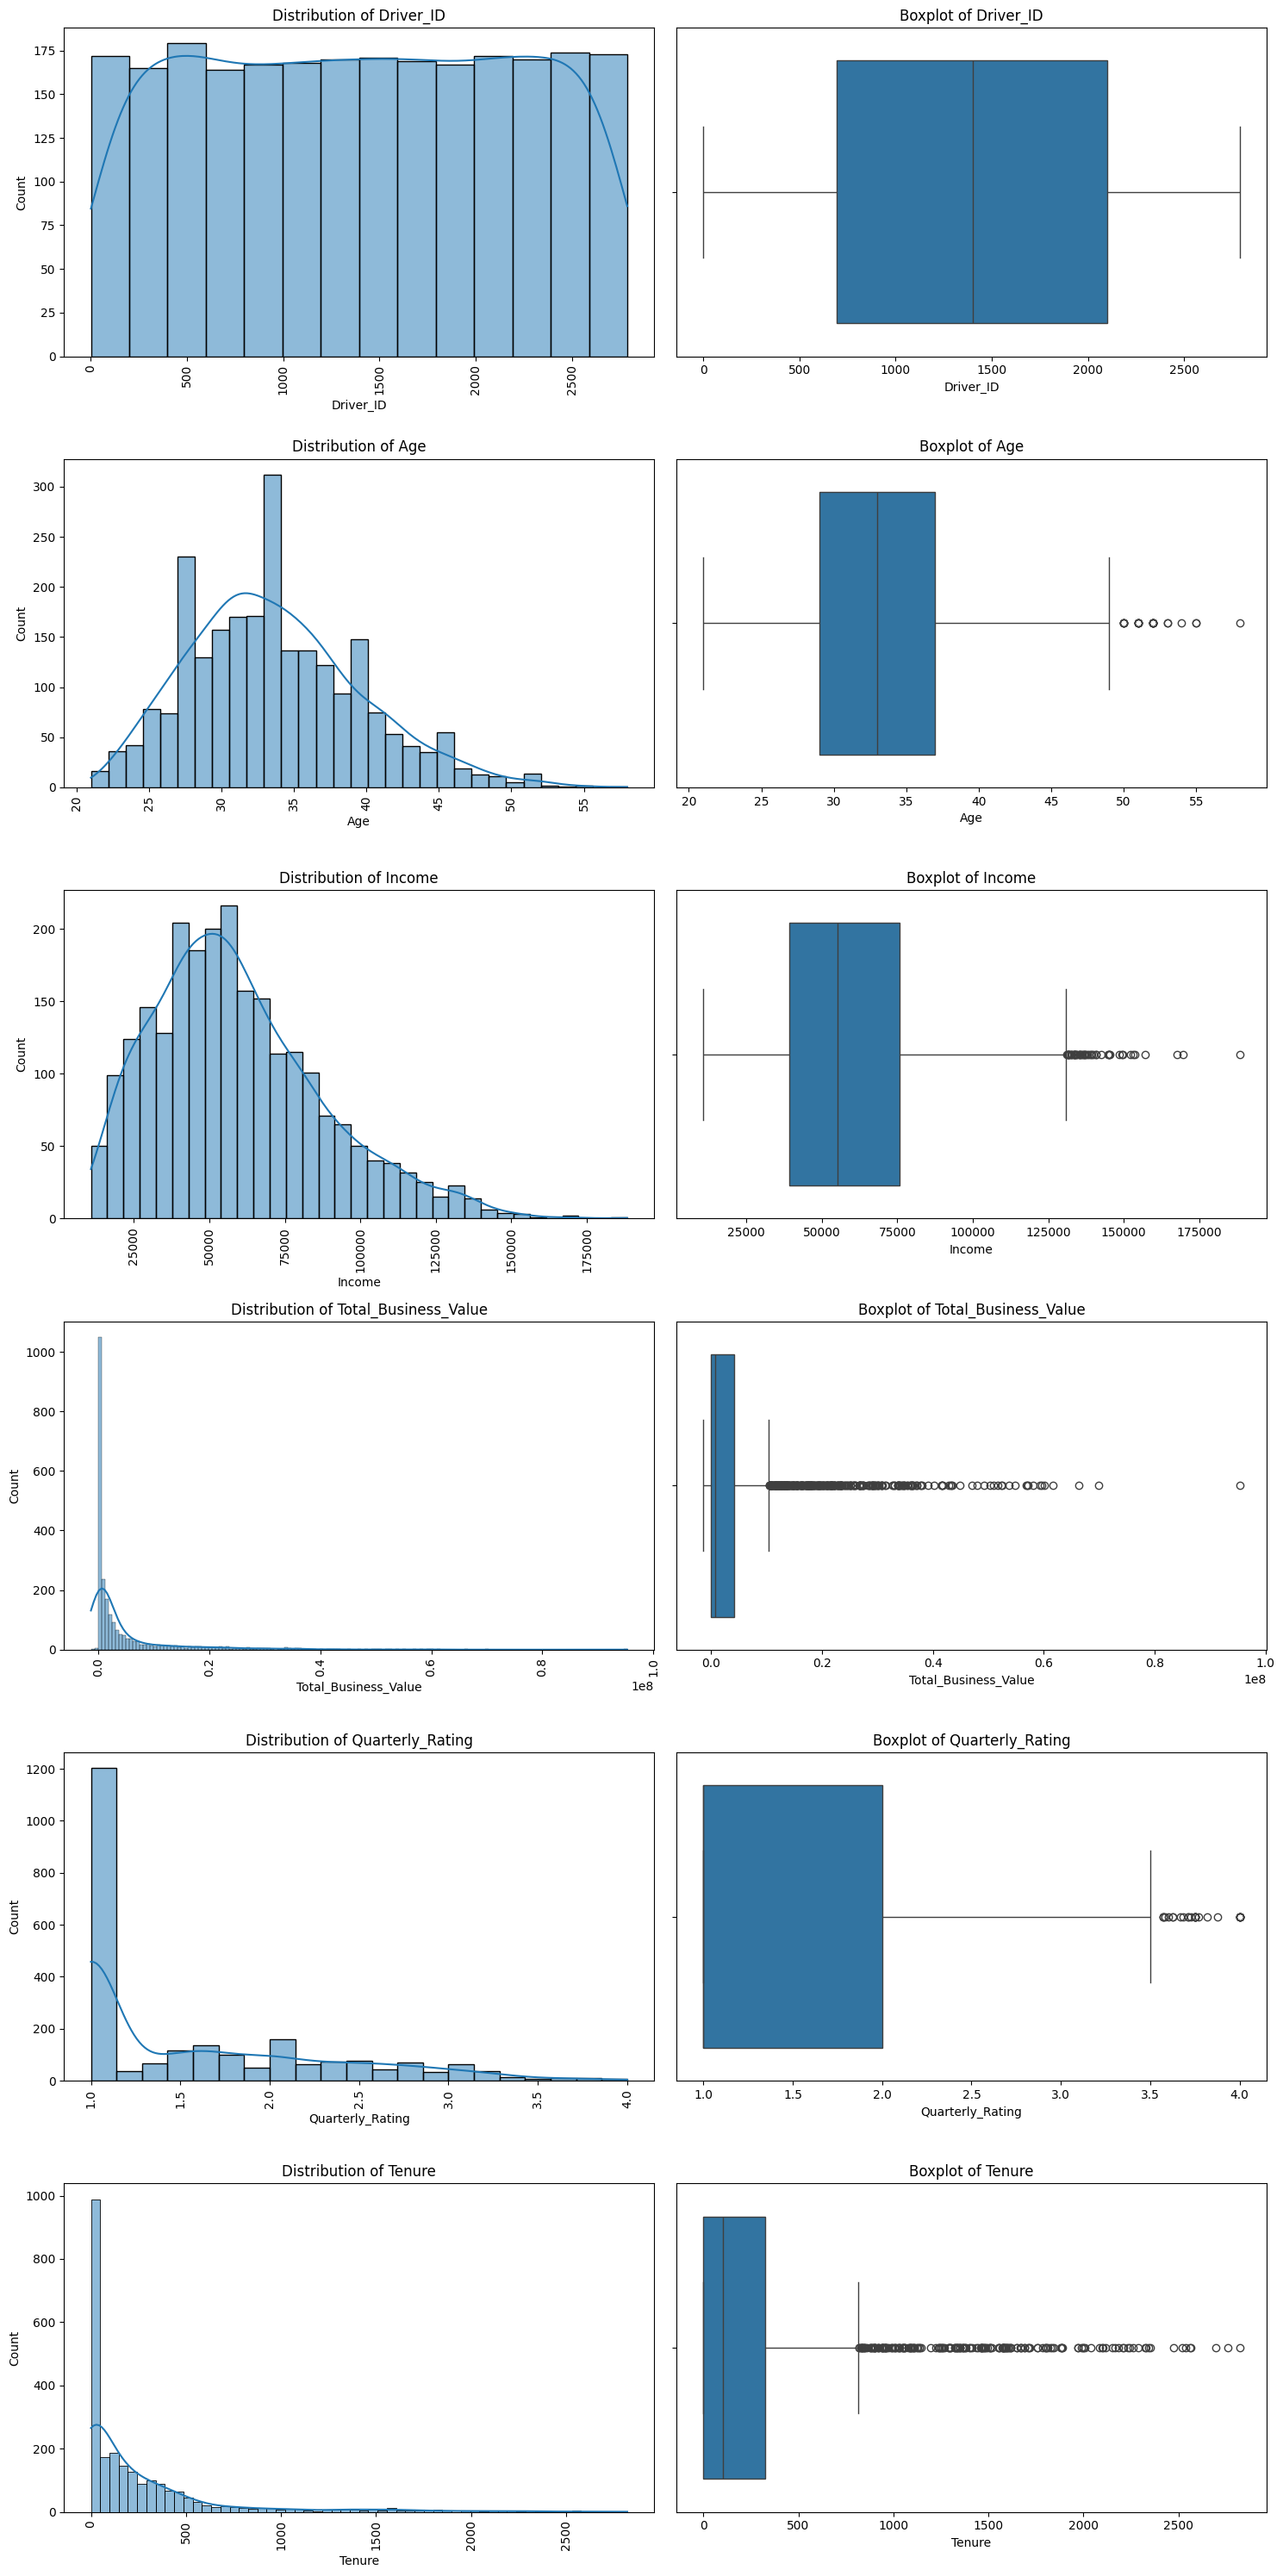

In [ ]:
n_cols = 2
n_rows = (len(numerical_columns))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    # Distribution plot (histogram + KDE)
    sns.histplot(df_merged[column], kde=True, ax=axes[2 * i])
    axes[2 * i].set_title(f"Distribution of {column}")
    axes[2 * i].tick_params(axis='x', rotation=90)

    # Box plot
    sns.boxplot(x=df_merged[column], ax=axes[2 * i + 1])
    axes[2 * i + 1].set_title(f"Boxplot of {column}")


for ax in axes[len(numerical_columns) * 2:]:
    ax.axis('off')


plt.tight_layout()
plt.show()

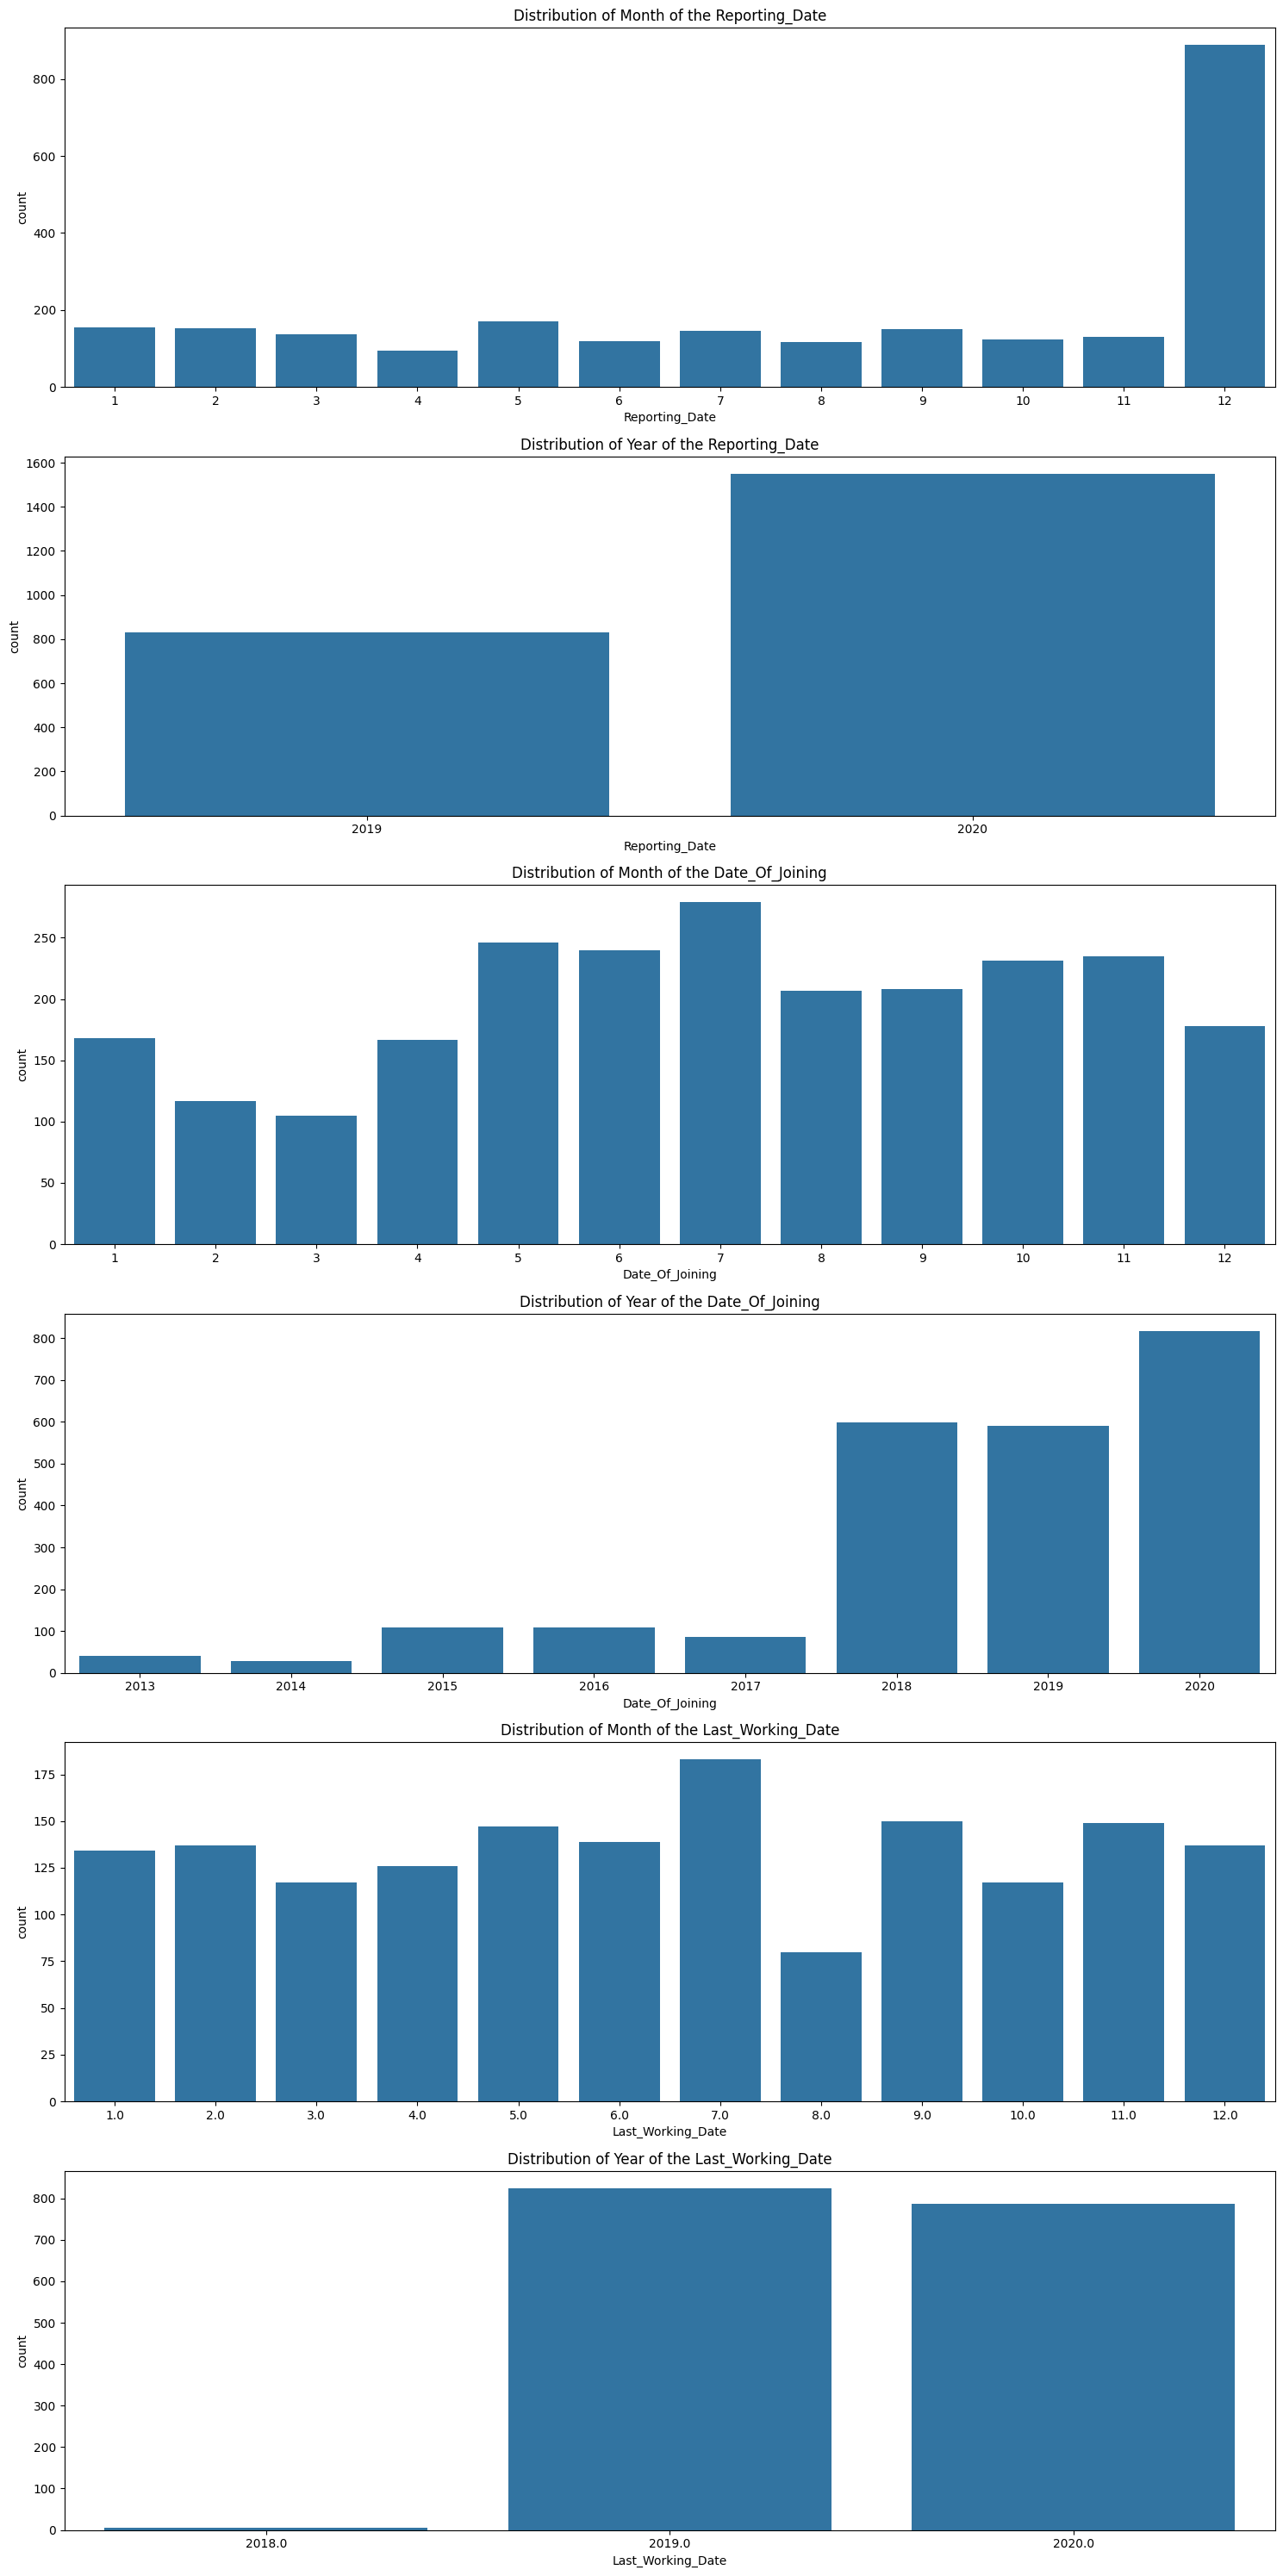

In [ ]:
n_cols = 1
n_rows = 2 * (len(timeseries_columns))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

axes.flatten()


for i, column in enumerate(timeseries_columns):
    # Distribution plot (histogram + KDE)
    sns.countplot(x=df_merged[column].dt.month, ax=axes[2 * i])
    axes[2 * i].set_title(f'Distribution of Month of the {column}')

    sns.countplot(x=df_merged[column].dt.year, ax=axes[2 * i + 1])
    axes[2 * i + 1].set_title(f'Distribution of Year of the {column}')

plt.tight_layout()
plt.show()

Most people have left the company in the years 2019 and 2020. during the month of July followed by September and November

## Bivariate Analysis

### Grade vs Business Value

In [ ]:
grade_df = df_merged.groupby('Grade').agg({'Total_Business_Value' : 'sum'}).reset_index()
# grade_df

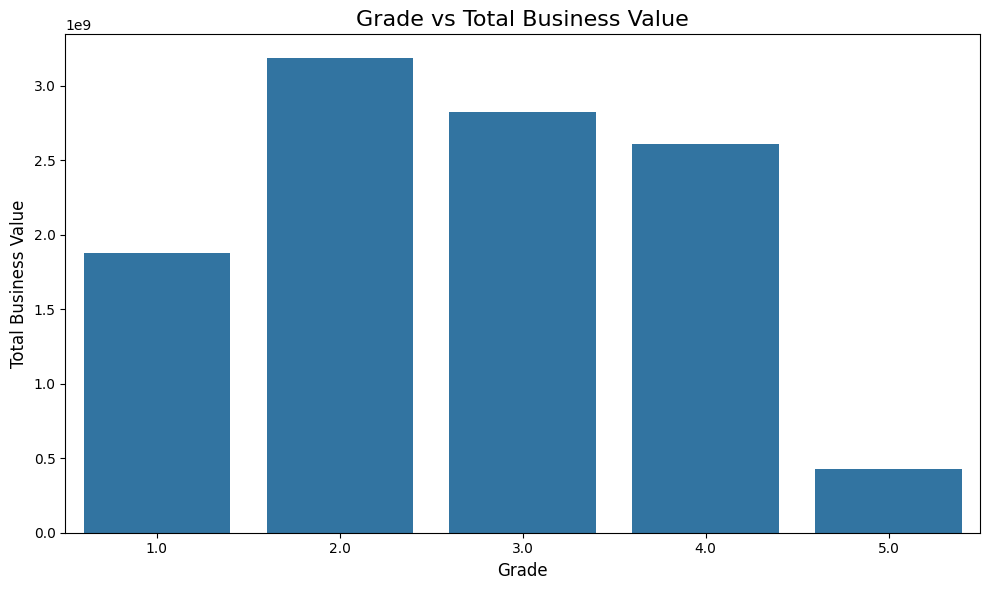

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Grade', y='Total_Business_Value', ci=None, data=grade_df)

plt.title('Grade vs Total Business Value', fontsize=16)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Total Business Value', fontsize=12)

plt.tight_layout()
plt.show()

Drivers with grade 2 3 and 4 on the day of reporting day have contributed more to the Business Value

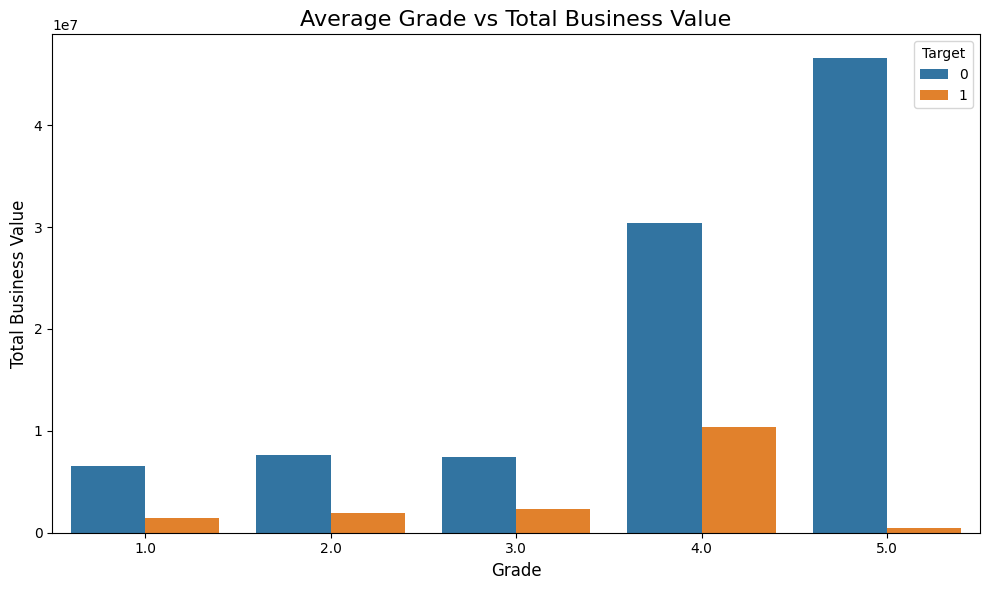

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Grade', y='Total_Business_Value', hue='Target', ci=None, data=df_merged)

plt.title('Average Grade vs Total Business Value', fontsize=16)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Total Business Value', fontsize=12)

plt.legend(title='Target', loc='upper right')

plt.tight_layout()
plt.show()

1. Drivers with avg grade of 4 and 5 contribute significantly more when they stay with the company.
3. Drivers from avg grade 4 are observed to leave more compared to the grade 5 drives
2. Lower average grade drivers (grades 1-3) contribute less overall, with minimal difference between those stay or leave.

### City vs Business Value

In [ ]:
city_df = df_merged.groupby('City').agg({'Total_Business_Value' : 'sum'}).reset_index()
# city_df

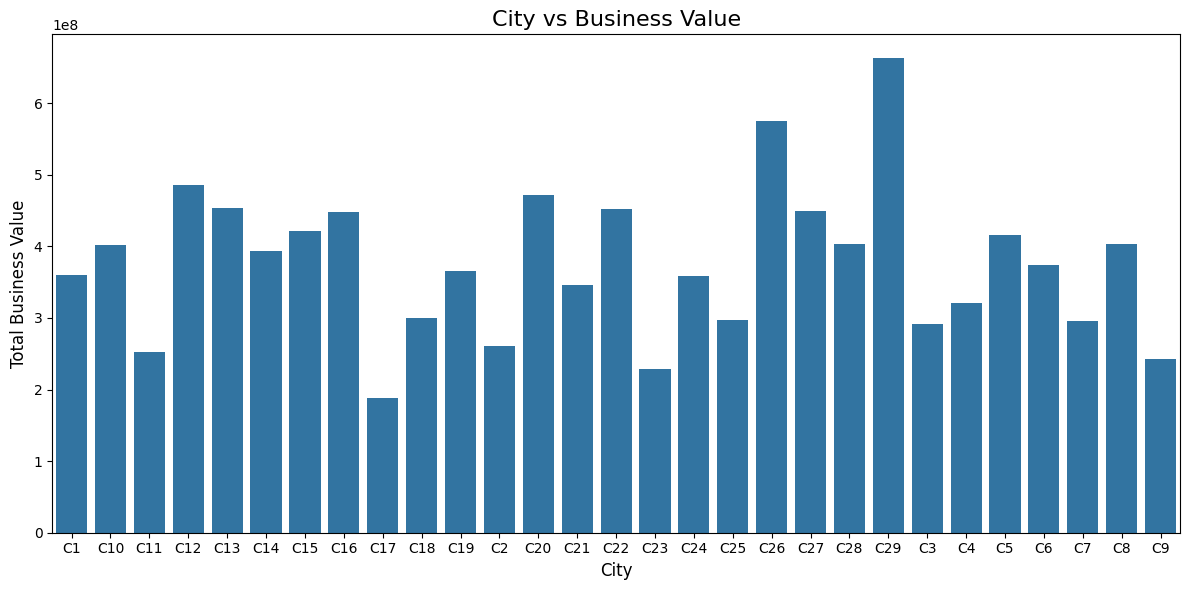

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(x='City', y='Total_Business_Value', ci=None, data=city_df)

plt.title('City vs Business Value', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Business Value', fontsize=12)

plt.tight_layout()
plt.show()

Total Business Value of Drivers is highest in C29 followed by C26


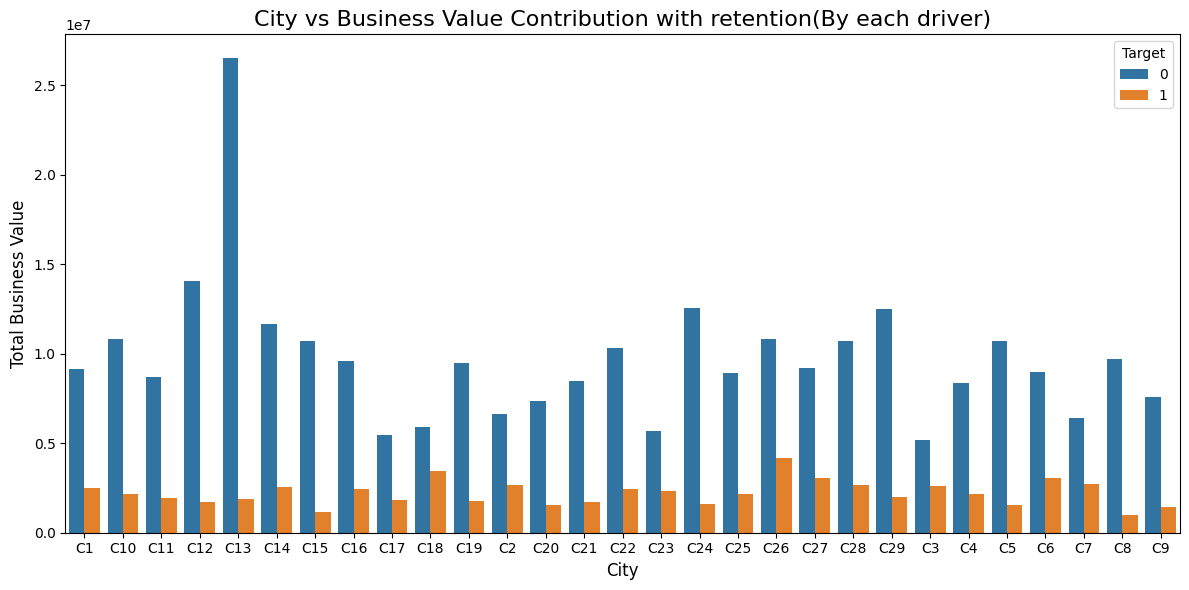

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(x='City', y='Total_Business_Value', hue='Target', ci=None, data=df_merged)

plt.title('City vs Business Value Contribution with retention(By each driver)', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Business Value', fontsize=12)

plt.tight_layout()
plt.show()

Drivers who have worked mostly in C13 have contributed more to the total value of business and also have stayed with the company

### City vs Quaterly Rating

In [ ]:
df_year = df_merged.copy()
df_year['Year'] = df_year['Reporting_Date'].dt.year
df_year['Quarter'] = df_year['Reporting_Date'].dt.quarter
df_year.drop(columns=['Reporting_Date'], inplace=True)
# df_year

In [ ]:
city_df = df_year[df_year['Year'] == 2020].groupby('City').agg({'Quarterly_Rating' : 'mean'}).reset_index()
# city_df

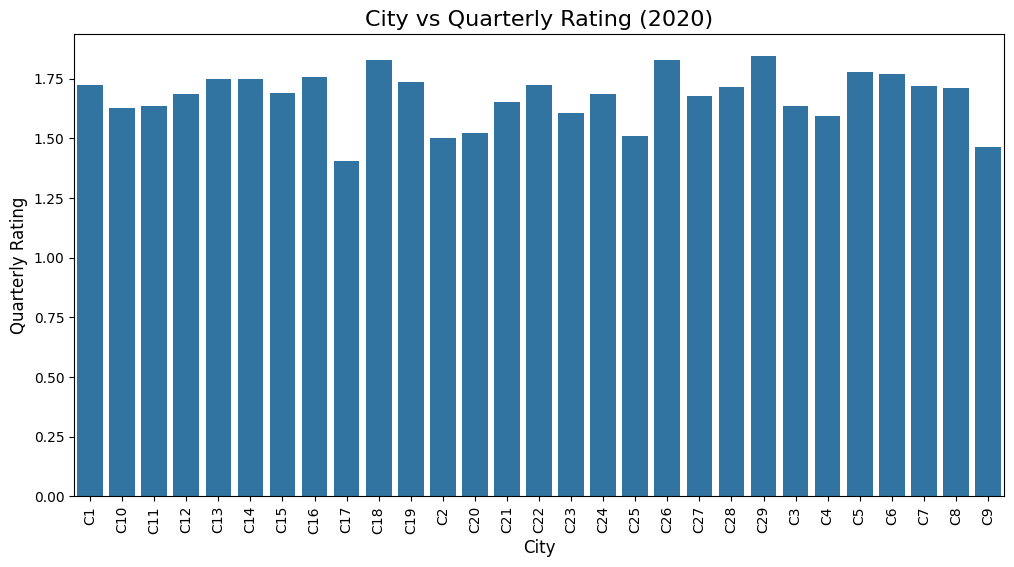

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(x='City', y='Quarterly_Rating', data=city_df)

plt.title('City vs Quarterly Rating (2020)', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Quarterly Rating', fontsize=12)

plt.xticks(rotation=90)
plt.show()

Cities C29, C26, C18 have shown good Quaterly Ratings in the year 2020

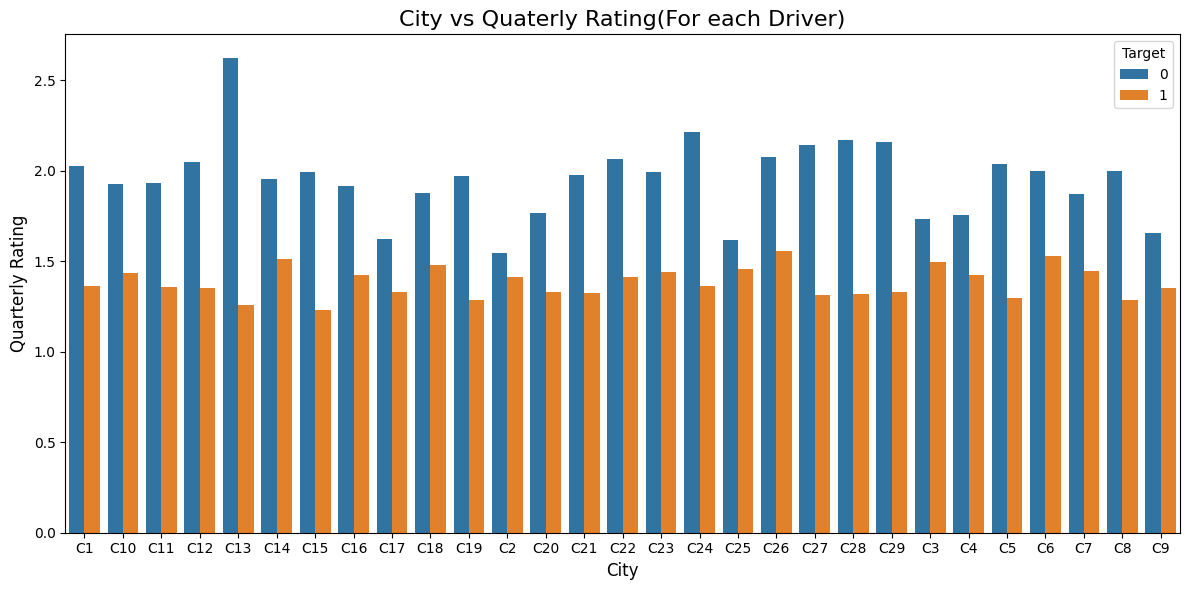

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(x='City', y='Quarterly_Rating', hue='Target', ci=None, data=df_merged)

plt.title('City vs Quaterly Rating(For each Driver)', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Quarterly Rating', fontsize=12)

plt.tight_layout()
plt.show()

As can observe from abaove drivers who are exculsively wroked in C13 have good quaterly rating and stayed with the company

### Quarterly Rating vs Business Value

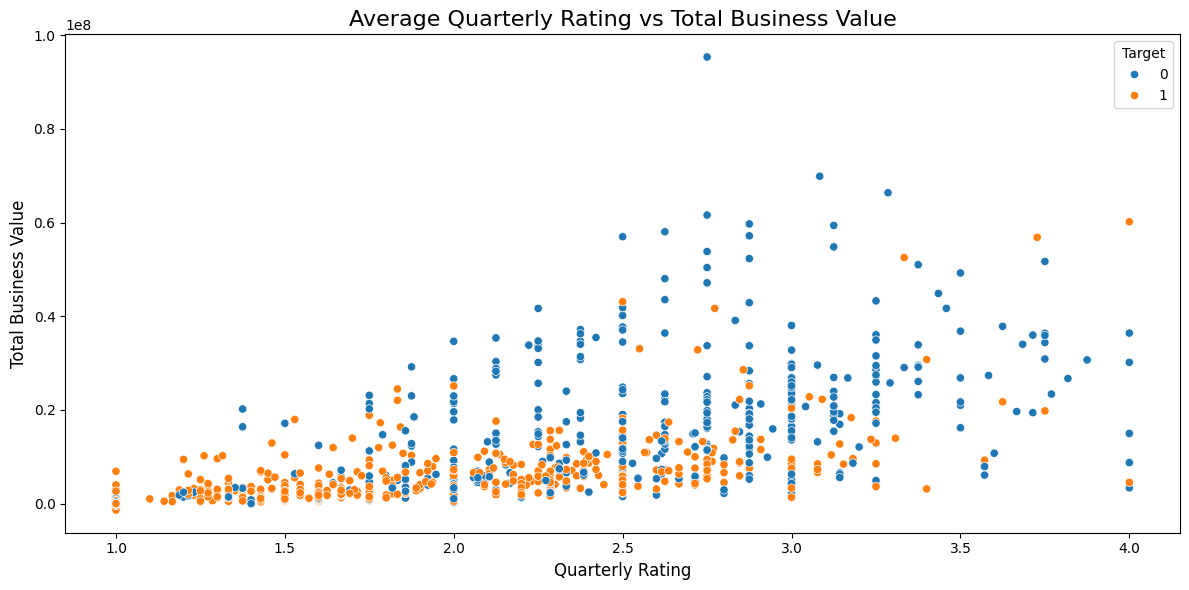

In [ ]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x='Quarterly_Rating', y='Total_Business_Value', hue='Target', data=df_merged)

plt.title('Average Quarterly Rating vs Total Business Value', fontsize=16)
plt.xlabel('Quarterly Rating', fontsize=12)
plt.ylabel('Total Business Value', fontsize=12)

plt.legend(title='Target', loc='upper right')

plt.tight_layout()
plt.show()

As we can observe, the drivers with less avg quaterly rating tend to leave more

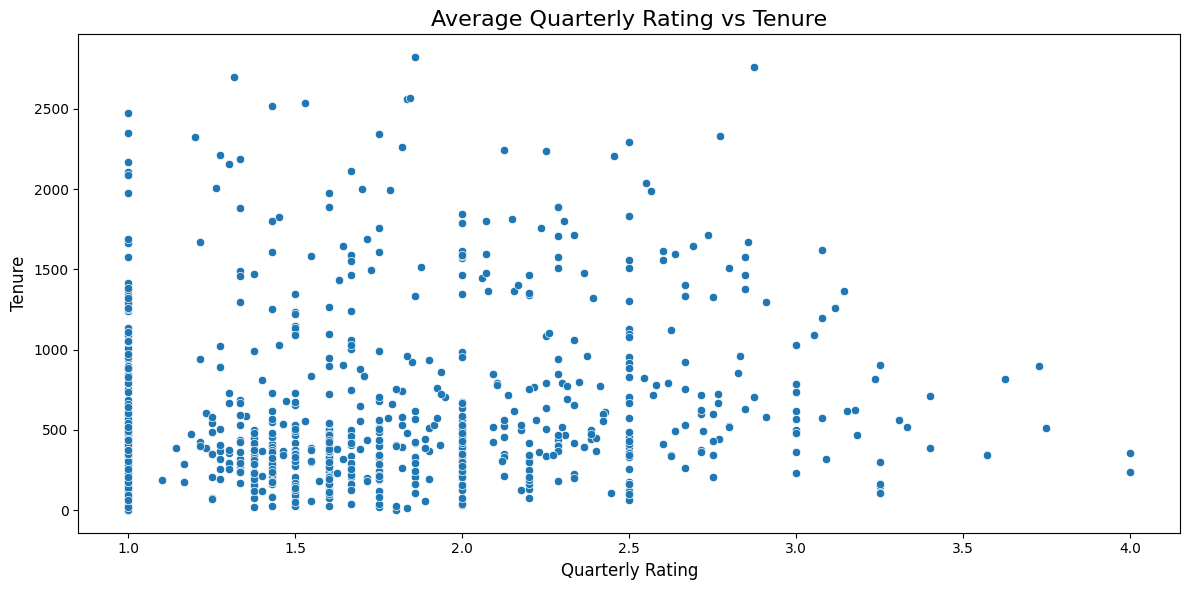

In [ ]:
df_filtered = df_merged[df_merged['Tenure'] > 0.0]

plt.figure(figsize=(12, 6))

sns.scatterplot(x='Quarterly_Rating', y='Tenure', data=df_filtered)

plt.title('Average Quarterly Rating vs Tenure', fontsize=16)
plt.xlabel('Quarterly Rating', fontsize=12)
plt.ylabel('Tenure', fontsize=12)

plt.tight_layout()
plt.show()

People with less average quaterly rating and less tenure leave the company more

### Quarterly Rating vs Reporting Date

In [ ]:
reporting_df = df.groupby('Reporting_Date').agg({'Quarterly_Rating' : 'mean'}).reset_index()
# reporting_df

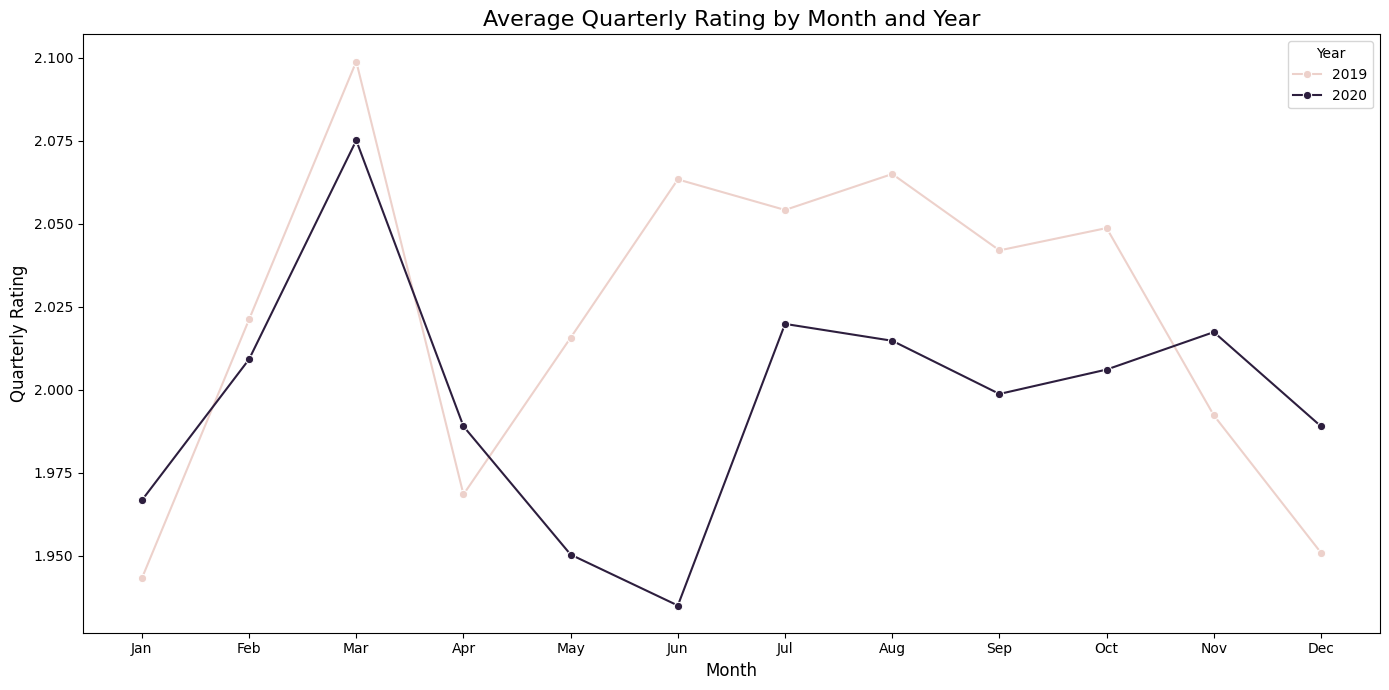

In [ ]:
reporting_df['Year'] = reporting_df['Reporting_Date'].dt.year
reporting_df['Month'] = reporting_df['Reporting_Date'].dt.month

plt.figure(figsize=(14, 7))

sns.lineplot(x='Month', y='Quarterly_Rating', hue='Year', data=reporting_df, marker='o')

plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.title('Average Quarterly Rating by Month and Year', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Quarterly Rating', fontsize=12)

plt.tight_layout()
plt.show()

1. The average quaterly ratings are very bad in 2020 compared to 2019
2. The average qurterly ratings are very high during the month of March

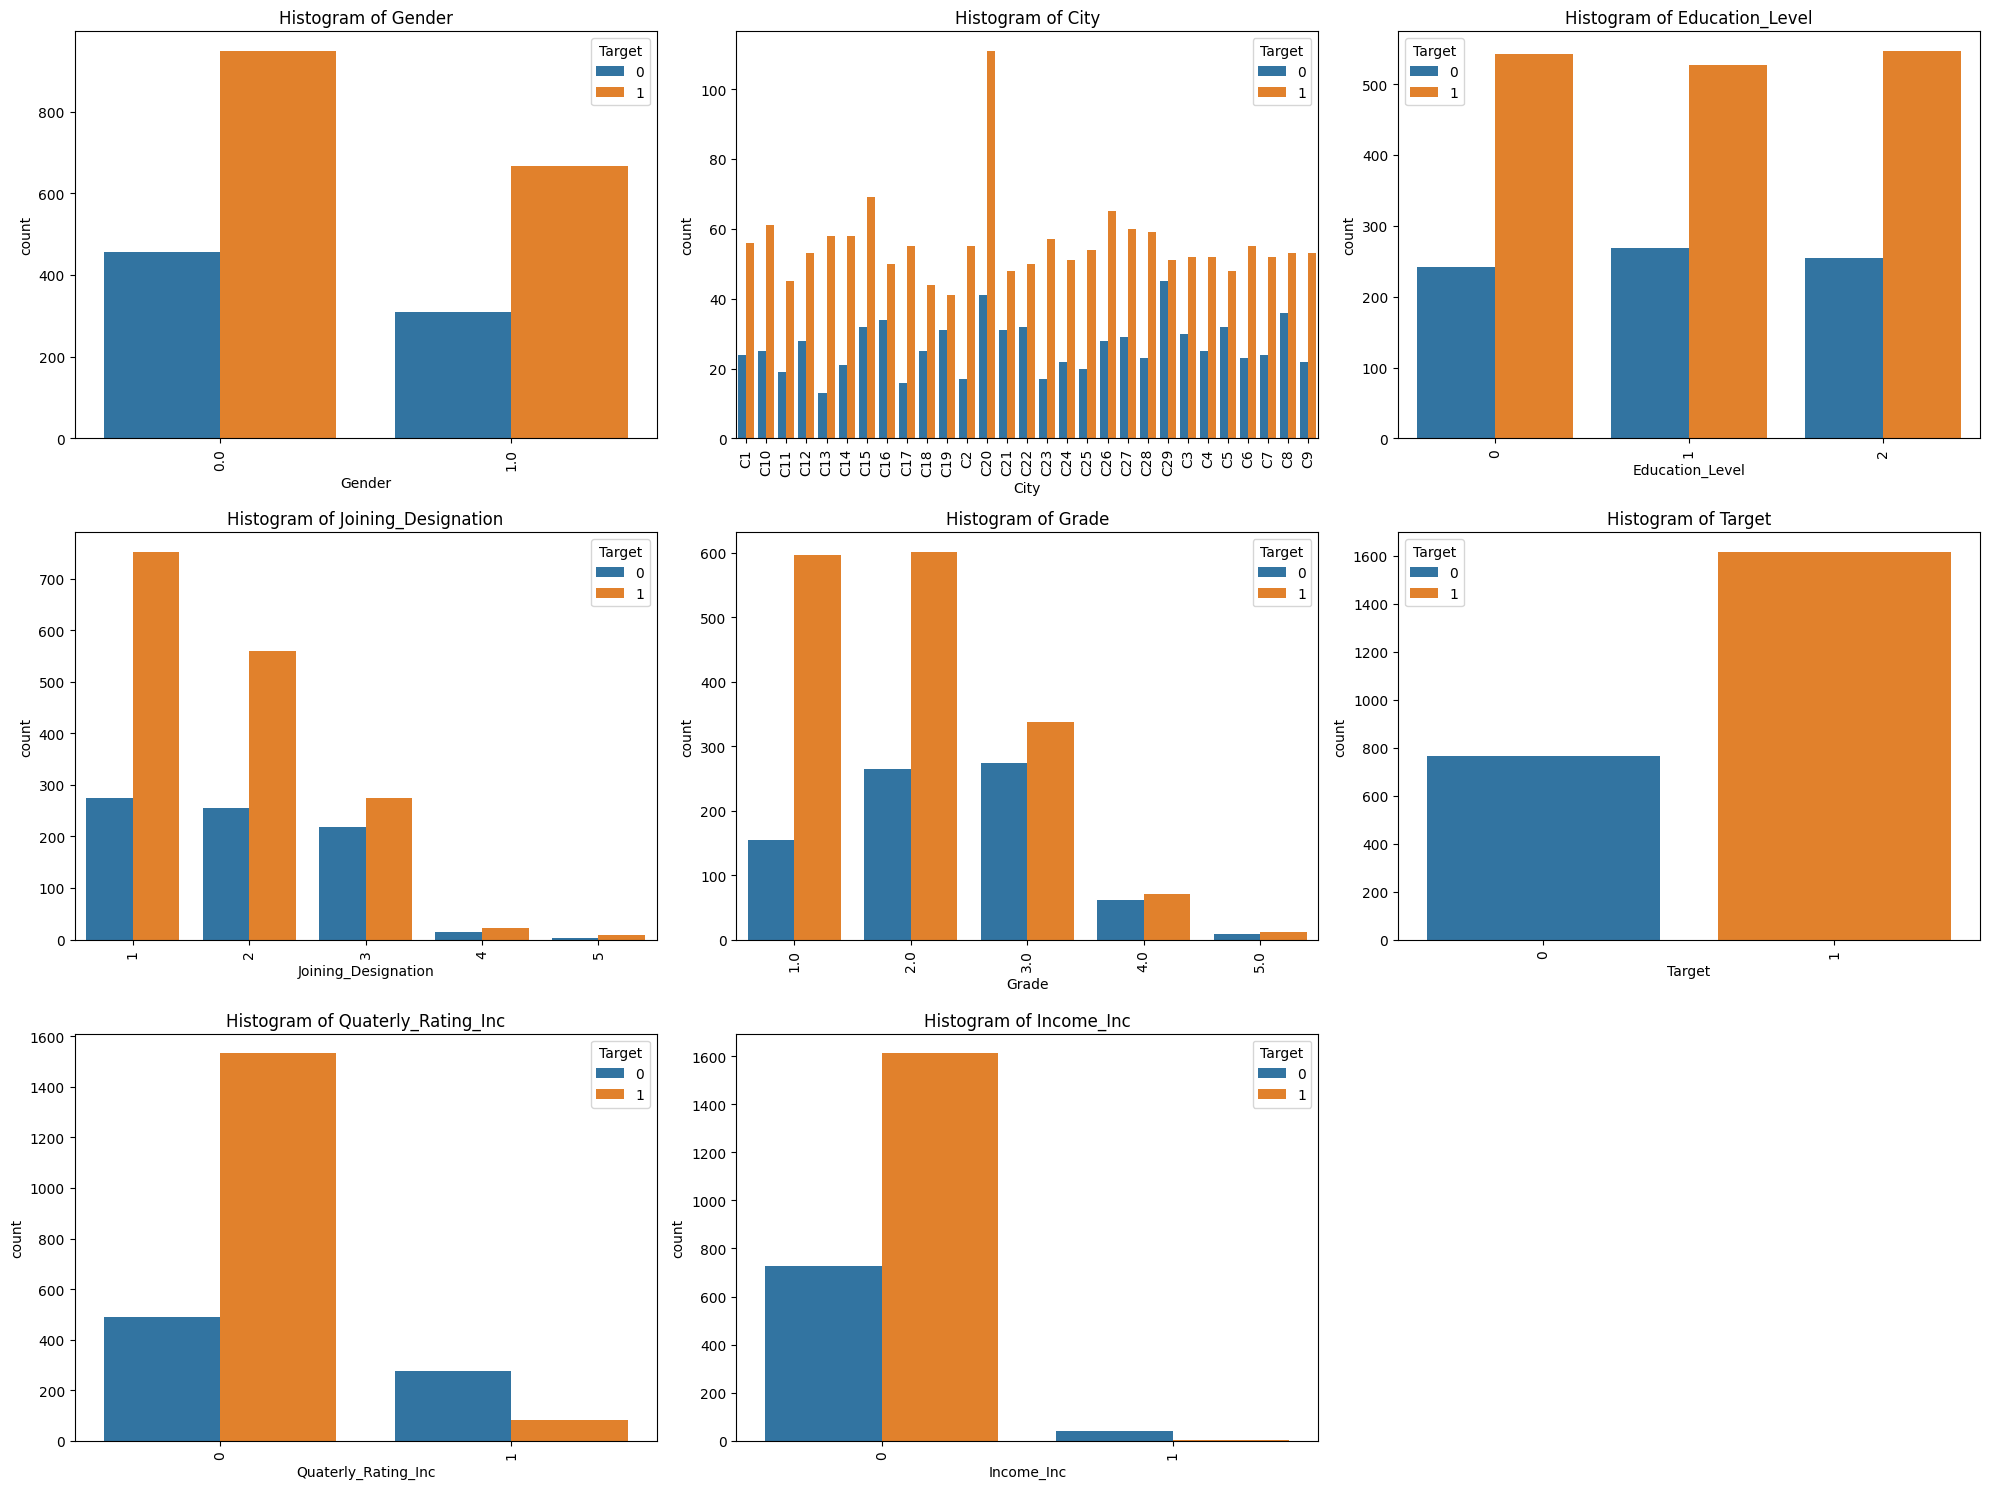

In [ ]:
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df_merged, hue='Target', ax=axes[i])
    axes[i].set_title(f"Histogram of {column}")
    axes[i].tick_params(axis='x', rotation=90)

for ax in axes[len(categorical_columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

1. Churn is higher in Male gender
2. There are more people who have left from city C20
3. People of Grade 1 and 2 churn more
4. 70% of the Drivers who did not get any increment in income left the company
5. 75% of people who do not have an increse in quarterly rating left the company

## Multivariate Analysis

In [ ]:
df_no_city = df_merged.drop(columns=['City', 'Reporting_Date', 'Last_Working_Date', 'Date_Of_Joining'])

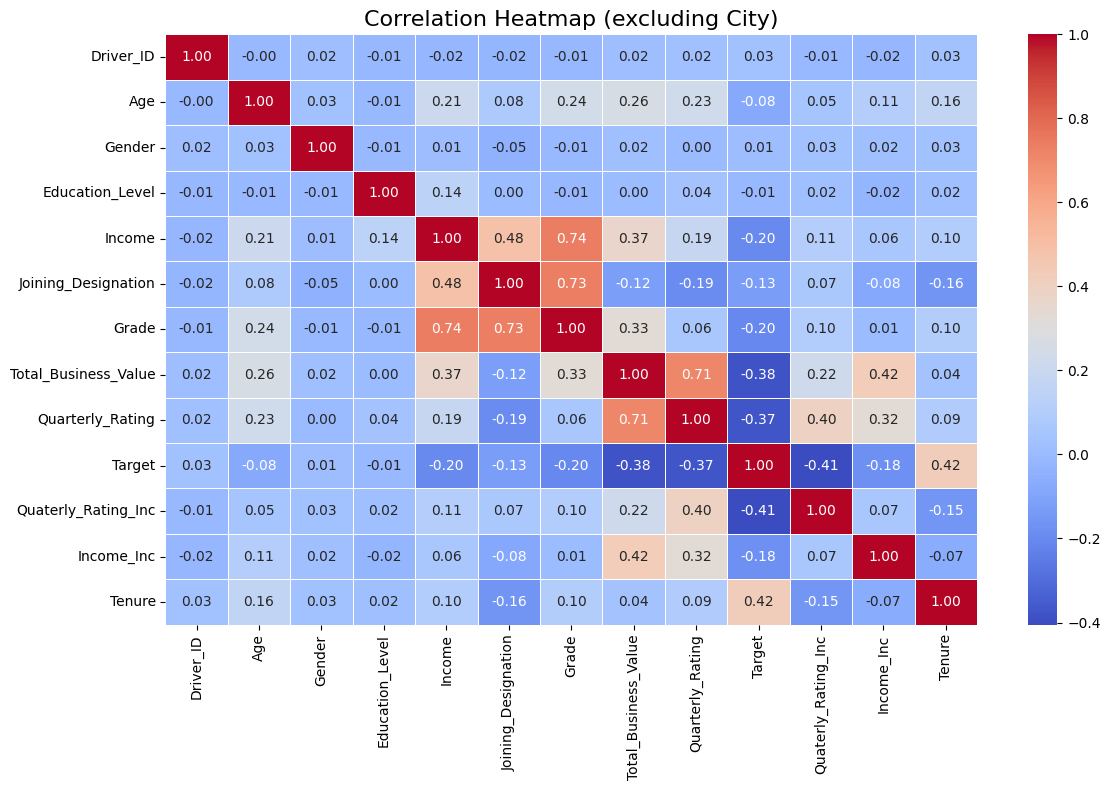

In [ ]:
corr_matrix = df_no_city.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap (excluding City)', fontsize=16)
plt.tight_layout()
plt.show()

1. Quarterly Rating and Total Business Value are highly correlated
2. Grade is highly positively correlated to Income and Joining Designations
3. Total Business Value has a good postive correaltion with Income and Grade

# Data Preprocessing

In [ ]:
reportings_df = df.groupby('Driver_ID').agg({'Reporting_Date' : 'count'}).reset_index()
reportings_df.rename(columns={'Reporting_Date' : 'Reportings'}, inplace=True)
reportings_df

,Driver_ID,Reportings
0,1,3
1,2,2
2,4,5
3,5,3
4,6,5
...,...,...
2376,2784,24
2377,2785,3
2378,2786,9
2379,2787,6


In [ ]:
df_final = df_merged.merge(reportings_df, on='Driver_ID', how='left')
df_final['Joining_Year'] = df_final['Date_Of_Joining'].dt.year
df_final['Joining_Month'] = df_final['Date_Of_Joining'].dt.month
df_final.drop(columns=['Reporting_Date', 'Last_Working_Date', 'Date_Of_Joining'], inplace=True)
df_final

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Target,Quaterly_Rating_Inc,Income_Inc,Tenure,Reportings,Joining_Year,Joining_Month
0,1,28.0,0.0,C23,2,57387.0,1,1.0,1715580,2.000000,1,0,0,314.0,3,2018,12
1,2,31.0,0.0,C7,2,67016.0,2,2.0,0,1.000000,0,0,0,0.0,2,2020,6
2,4,43.0,0.0,C13,2,65603.0,2,2.0,350000,1.000000,1,0,0,290.0,5,2019,7
3,5,29.0,0.0,C9,0,46368.0,1,1.0,120360,1.000000,1,0,0,0.0,3,2019,9
4,6,31.0,1.0,C11,1,78728.0,3,3.0,1265000,1.600000,0,1,0,0.0,5,2020,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0,82815.0,2,3.0,21748820,2.625000,0,1,0,0.0,24,2015,10
2377,2785,34.0,1.0,C9,0,12105.0,1,1.0,0,1.000000,1,0,0,61.0,3,2020,8
2378,2786,45.0,0.0,C19,0,35370.0,2,2.0,2815090,1.666667,1,0,0,418.0,9,2018,7
2379,2787,28.0,1.0,C20,2,69498.0,1,1.0,977830,1.500000,1,0,0,334.0,6,2018,7


## One-hot Encoding

In [ ]:
df_final = pd.get_dummies(df_final, columns=['City'], drop_first=True)

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df_final.drop(columns=['Driver_ID', 'Target'])
y = df_final['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1904, 42)
Shape of X_test: (477, 42)
Shape of y_train: (1904,)
Shape of y_test: (477,)


## Standardization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.transform(X_test)

print("Shape of X_train_stand:", X_train_stand.shape)
print("Shape of X_test_stand:", X_test_stand.shape)

Shape of X_train_stand: (1904, 42)
Shape of X_test_stand: (477, 42)


## SMOTE Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_stand, y_train)

print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)

Shape of X_train_resampled: (2578, 42)
Shape of y_train_resampled: (2578,)


# Ensamble Learning

## Bagging (Random Forest Classifier)

### Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

In [ ]:
params = {
    "max_depth" : [2, 5, 7, 10, 15],
    "n_estimators" : [100, 200, 300, 400],
    "max_features" : [4, 7, 10],
    "ccp_alpha" : [0.0005, 0.00075, 0.001]
}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=params, cv=5, n_jobs=-1, verbose=2)

# Measure the time taken to fit the model
start_time = time.time()
grid_search.fit(X_train_resampled, y_train_resampled)
end_time = time.time()

print("Best parameters found by GridSearchCV:", grid_search.best_params_)
print(f"Total training time: {end_time - start_time:.2f} seconds")

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters found by GridSearchCV: {'ccp_alpha': 0.0005, 'max_depth': 15, 'max_features': 4, 'n_estimators': 400}
Total training time: 667.14 seconds


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train_resampled)
y_test_pred = best_model.predict(X_test_stand)

train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.98
Test Accuracy: 0.95


In [ ]:
grid_search.best_score_

0.9720719500263415

* Training Accuracy: 0.98: This indicates that the Random Forest model achieved
98% accuracy on the training dataset. Such a high accuracy suggests that the model has learned the training data very well.

* Test Accuracy: 0.95: When evaluated on the test set, the model obtained an accuracy of 95%. This metric shows how effectively the model performs on new, unseen data. While this is still a strong result, the accuracy is slightly lower than on the training data, which is typical due to overfitting not occurring.

* Best Model Score: 0.97: This score likely refers to the highest performance metric (such as accuracy or F1-score) obtained during the cross-validation phase, where the model was tuned for optimal hyperparameters using methods like GridSearchCV. A score of 0.97 reflects that the model performed very well during this optimization process.

### Confusion Matrix and Classification Report


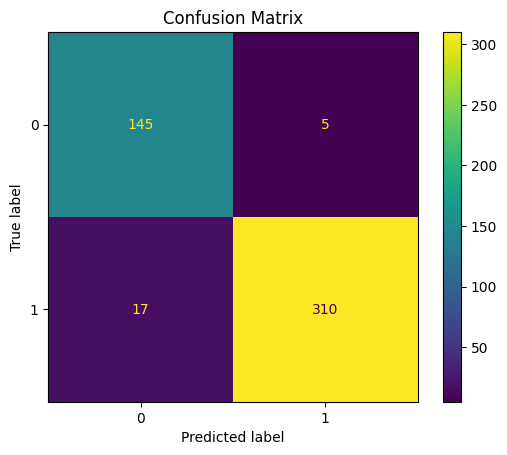

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       150
           1       0.98      0.95      0.97       327

    accuracy                           0.95       477
   macro avg       0.94      0.96      0.95       477
weighted avg       0.96      0.95      0.95       477



* Overall Performance: 95% accuracy, indicating strong model performance across all instances.
* Class 0 (Negative): Precision: 90%, Recall: 97%, F1-Score: 93% — Strong performance in identifying negative instances.
* Class 1 (Positive): Precision: 98%, Recall: 95%, F1-Score: 97% — Excellent balance and high accuracy for positive instances.
*Macro Average: Precision: 94%, Recall: 96%, F1-Score: 95% — Good balance across both classes.
* Weighted Average: Precision: 96%, Recall: 95%, F1-Score: 95% — Balanced performance, considering class imbalance.

The model shows high precision (especially for Class 1) and recall, meaning it both correctly identifies and avoids misclassifications effectively.

Despite some class imbalance, the model performs very well on both Class 0 and Class 1, ensuring generalization across various types of data.

### Feature Importance

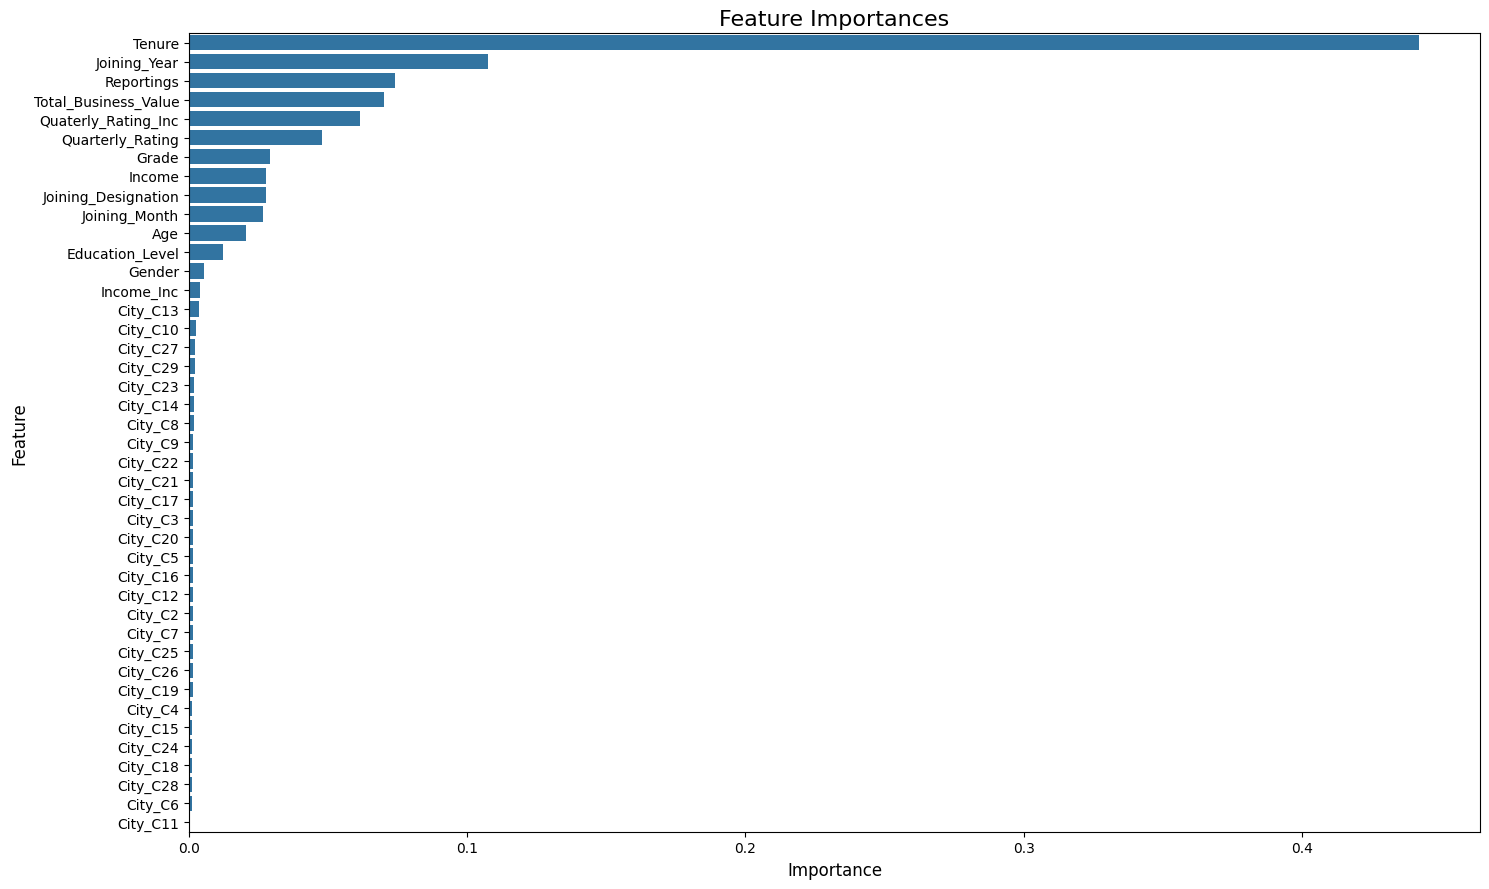

In [ ]:
feature_importances = best_model.feature_importances_

feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances using seaborn
plt.figure(figsize=(15, 9))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)

# Set plot title and labels
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

Feature Importance in case of RandomForestClassifier:

1. Tenure is the most important feature that determines the Churn followed by Joining Year, Reportings, Total Business Value and Quaterly Rating.
2. Least important is City, Income increment followed by Education Level and Gender

### ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc

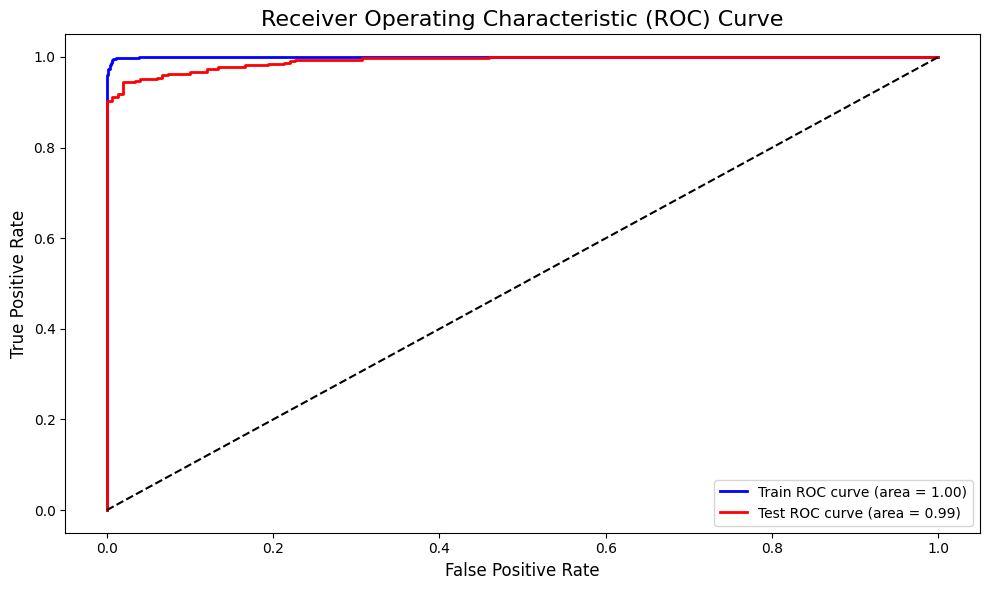

In [ ]:
y_train_prob = best_model.predict_proba(X_train_resampled)[:, 1]
y_test_prob = best_model.predict_proba(X_test_stand)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train_resampled, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

1. **Train ROC AUC**: 1.00
    * An AUC of 1.00 on the training data means that the model perfectly distinguishes between the positive and negative classes for the training set.
    * This suggests that the model has learned the training data exceptionally well, with no errors in classification.

2. **Test ROC AUC**: 0.99
    * An AUC of 0.99 on the test data is also extremely high and indicates that the model generalizes very well to unseen data.
    * It suggests that the model performs almost as well on the test data as it does on the training data, with only a tiny drop in performance.

The fact that the train AUC is 1.00 and the test AUC is 0.99 implies that overfitting is not a major concern here. Even though the training AUC is perfect, the model maintains a very high AUC on the test set.

### Precision Recall Curve

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

Train Precision-Recall AUC: 1.00
Test Precision-Recall AUC: 1.00


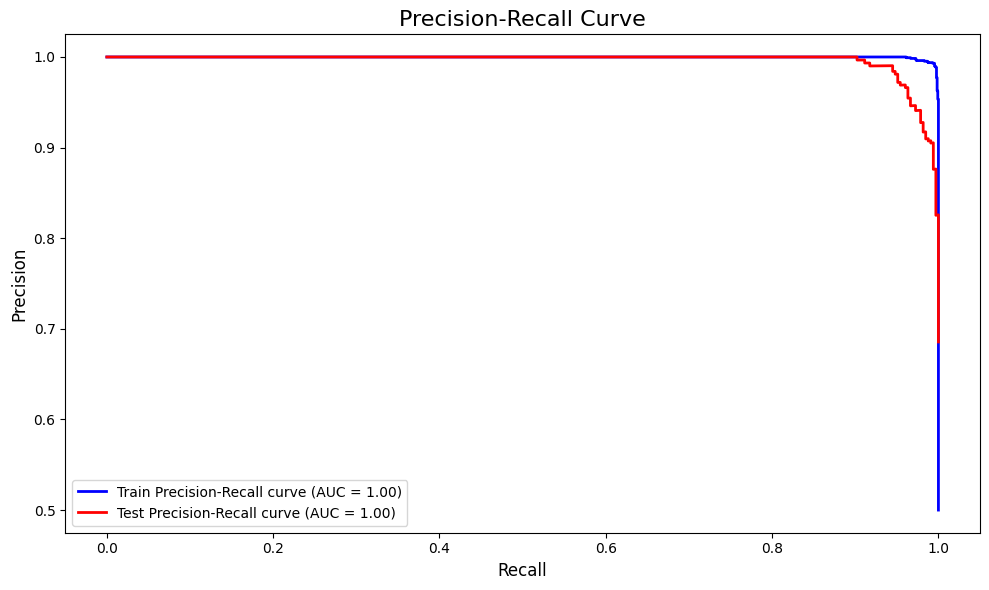

In [ ]:
y_train_prob = best_model.predict_proba(X_train_resampled)[:, 1]
y_test_prob = best_model.predict_proba(X_test_stand)[:, 1]

precision_train, recall_train, _ = precision_recall_curve(y_train_resampled, y_train_prob)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_prob)

pr_auc_train = auc(recall_train, precision_train)
pr_auc_test = auc(recall_test, precision_test)

print(f"Train Precision-Recall AUC: {pr_auc_train:.2f}")
print(f"Test Precision-Recall AUC: {pr_auc_test:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(recall_train, precision_train, color='blue', lw=2, label=f'Train Precision-Recall curve (AUC = {pr_auc_train:.2f})')
plt.plot(recall_test, precision_test, color='red', lw=2, label=f'Test Precision-Recall curve (AUC = {pr_auc_test:.2f})')

plt.title('Precision-Recall Curve', fontsize=16)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

1. The training Precision-Recall AUC of 1.00 indicates that the model perfectly distinguishes between the positive and negative classes in the training data. It shows that the model achieves an ideal balance between precision and recall without any errors during training.

2. The test Precision-Recall AUC of 1.00 means the model also perfectly balances precision and recall on the unseen test data, demonstrating excellent generalization to new, unseen examples.

This suggests that the model is highly robust, with an ideal trade-off between precision and recall across both training and test datasets.


## Boosting(LightGBM)

### Model

In [ ]:
import lightgbm as lgb

In [ ]:
params = {
    'num_leaves': [31, 50, 100],
    'metric': ['binary_logloss'],
    'boosting_type': ['gbdt'],
    'max_depth': [5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

In [ ]:
lgbm_classifier = lgb.LGBMClassifier(random_state=42)
grid_search = GridSearchCV(estimator=lgbm_classifier, param_grid=params, cv=5, n_jobs=-1, scoring='accuracy')

start_time = time.time()
grid_search.fit(X_train_resampled, y_train_resampled)
end_time = time.time()

print("Best parameters found by GridSearchCV:", grid_search.best_params_)
print(f"Total training time: {end_time - start_time:.2f} seconds")

[LightGBM] [Info] Number of positive: 1289, number of negative: 1289
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2937
[LightGBM] [Info] Number of data points in the train set: 2578, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best parameters found by GridSearchCV: {'boosting_type': 'gbdt', 'learning_rate': 0.01, 'max_depth': 15, 'metric': 'binary_logloss', 'n_estimators': 300, 'num_leaves': 31}
Total training time: 199.53 seconds


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
best_lgbm_model = grid_search.best_estimator_

y_lgbm_train_pred = best_lgbm_model.predict(X_train_resampled)
y_lgbm_test_pred = best_lgbm_model.predict(X_test_stand)

train_accuracy = accuracy_score(y_train_resampled, y_lgbm_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

test_accuracy = accuracy_score(y_test, y_lgbm_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.98
Test Accuracy: 0.96


In [ ]:
print(f"Grid Search best score: {grid_search.best_score_}")

Grid Search best score: 0.971299014073907


1. **Training Accuracy**: 0.98: The model achieved 98% accuracy on the training dataset, indicating that the model has learned the training data very well. This is a high accuracy, showing that the model is able to predict the training set instances with a very low error rate.

2. **Test Accuracy**: 0.95: The model achieved 95% accuracy, which indicates that the model is able to generalize to new, unseen data. A slightly lower test accuracy compared to the training accuracy is typical and expected.

3. **Best Model Score**: 0.97: The best score of 0.97 likely comes from the cross-validation process, where hyperparameters were tuned using techniques like GridSearchCV. This score represents the optimal performance obtained during the cross-validation phase.

    A score of 0.97 indicates that the model's hyperparameters were well-tuned and that the model performed very well during optimization, showing its potential to achieve strong results.

### Confusion Matrix and Classification Report


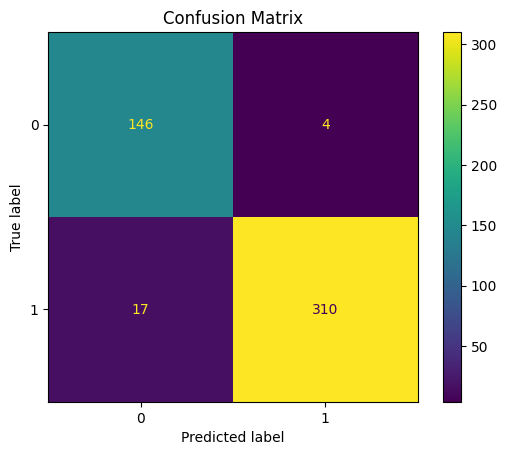

In [ ]:
conf_matrix = confusion_matrix(y_test, y_lgbm_test_pred)

disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_lgbm_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       150
           1       0.99      0.95      0.97       327

    accuracy                           0.96       477
   macro avg       0.94      0.96      0.95       477
weighted avg       0.96      0.96      0.96       477



* Overall Performance: 96% accuracy, indicating strong model performance across all instances.
* Class 0 (Negative): Precision: 90%, Recall: 97%, F1-Score: 93% — Strong performance in identifying negative instances.
* Class 1 (Positive): Precision: 99%, Recall: 95%, F1-Score: 97% — Excellent balance and high accuracy for positive instances.
* Macro Average: Precision: 94%, Recall: 96%, F1-Score: 95% — Good balance across both classes.
* Weighted Average: Precision: 96%, Recall: 96%, F1-Score: 96% — Balanced performance, considering class imbalance.

The model shows high precision (especially for Class 1) and recall, meaning it both correctly identifies and avoids misclassifications effectively.

Despite some class imbalance, the model performs very well on both Class 0 and Class 1, ensuring generalization across various types of data.

### Feature Importance

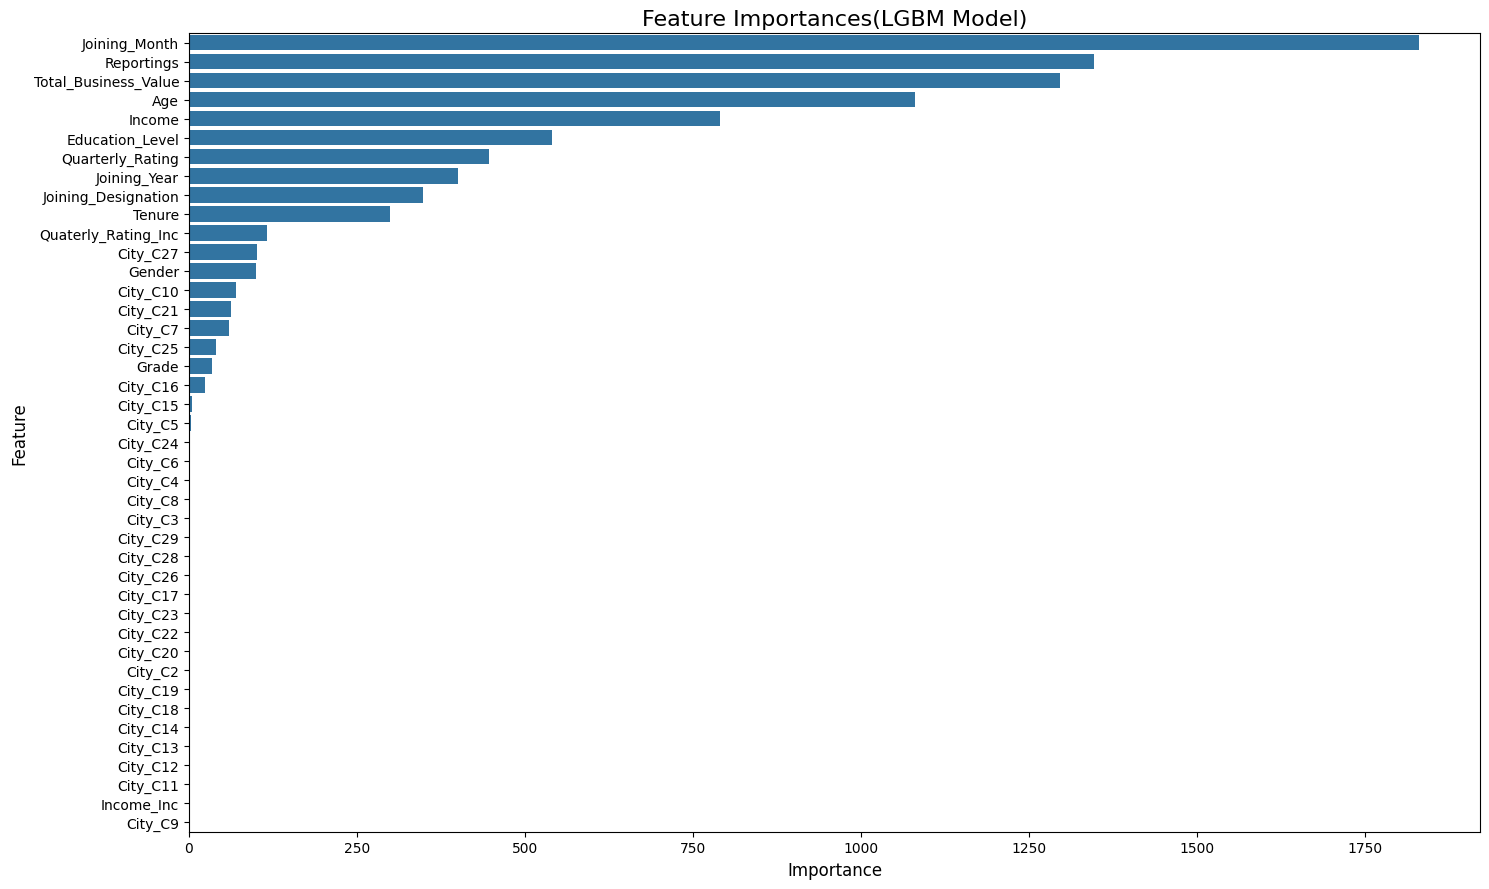

In [ ]:
feature_importances = best_lgbm_model.feature_importances_

feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances using seaborn
plt.figure(figsize=(15, 9))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)

# Set plot title and labels
plt.title('Feature Importances(LGBM Model)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

Feature Importance in case of LigthGBM:

1. Joining Month is the most important feature that determines the Churn followed by Reportings, Total Business Value and Age.
2. Least important is City, Grade followed by Gender

### ROC Curve

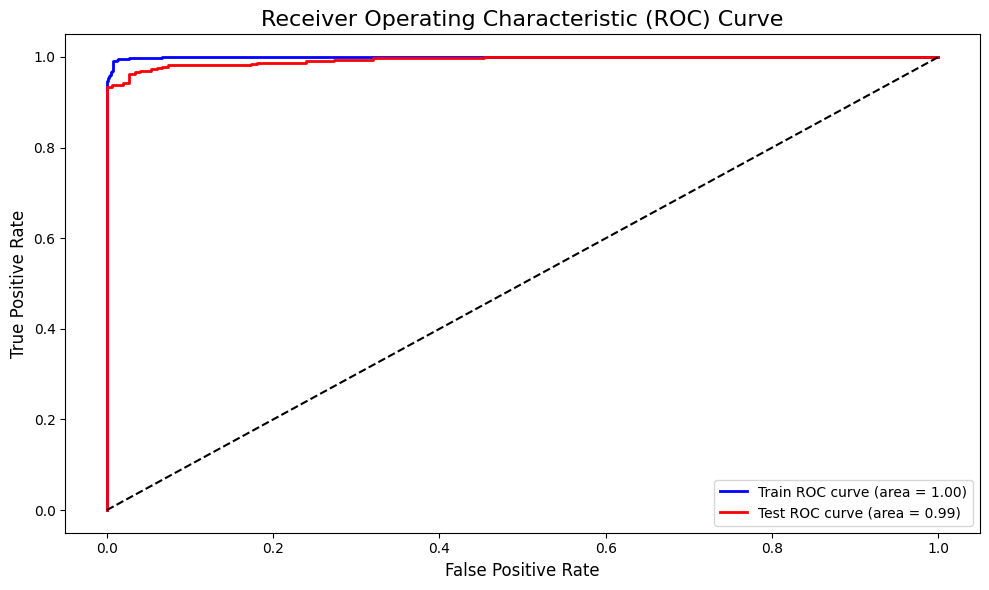

In [ ]:
y_train_lgbm_prob = best_lgbm_model.predict_proba(X_train_resampled)[:, 1]
y_test_lgbm_prob = best_lgbm_model.predict_proba(X_test_stand)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train_resampled, y_train_lgbm_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_lgbm_prob)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

1. **Train ROC AUC**: 1.00
    * An AUC of 1.00 on the training data means that the model perfectly distinguishes between the positive and negative classes for the training set.
    * This suggests that the model has learned the training data exceptionally well, with no errors in classification.

2. **Test ROC AUC**: 0.99
    * An AUC of 0.99 on the test data is also extremely high and indicates that the model generalizes very well to unseen data.
    * It suggests that the model performs almost as well on the test data as it does on the training data, with only a tiny drop in performance.

The fact that the train AUC is 1.00 and the test AUC is 0.99 implies that overfitting is not a major concern here. Even though the training AUC is perfect, the model maintains a very high AUC on the test set.

### Precision Recall Curve

Train Precision-Recall AUC: 1.00
Test Precision-Recall AUC: 1.00


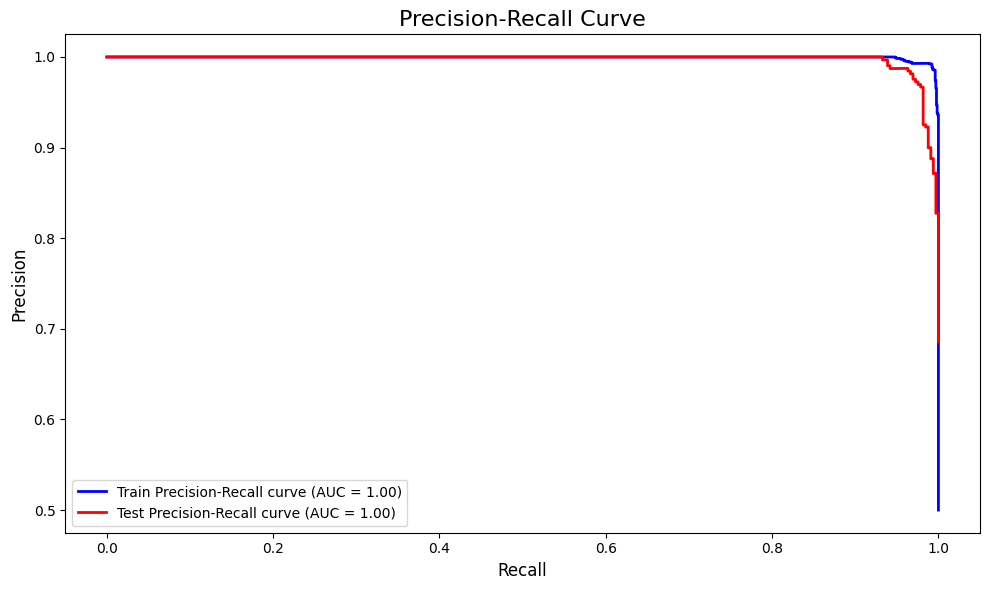

In [ ]:
precision_train, recall_train, _ = precision_recall_curve(y_train_resampled, y_train_lgbm_prob)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_lgbm_prob)

pr_auc_train = auc(recall_train, precision_train)
pr_auc_test = auc(recall_test, precision_test)

print(f"Train Precision-Recall AUC: {pr_auc_train:.2f}")
print(f"Test Precision-Recall AUC: {pr_auc_test:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(recall_train, precision_train, color='blue', lw=2, label=f'Train Precision-Recall curve (AUC = {pr_auc_train:.2f})')
plt.plot(recall_test, precision_test, color='red', lw=2, label=f'Test Precision-Recall curve (AUC = {pr_auc_test:.2f})')

plt.title('Precision-Recall Curve', fontsize=16)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

1. The training Precision-Recall AUC of 1.00 indicates that the model perfectly distinguishes between the positive and negative classes in the training data. It shows that the model achieves an ideal balance between precision and recall without any errors during training.

2. The test Precision-Recall AUC of 1.00 means the model also perfectly balances precision and recall on the unseen test data, demonstrating excellent generalization to new, unseen examples.

This suggests that the model is highly robust, with an ideal trade-off between precision and recall across both training and test datasets.


# Questionnaire and Business Recommendations

## Questionnaire

1. What percentage of drivers have received a quarterly rating of 5?

> None of the drivers got rating of 5

2. Comment on the correlation between Age and Quarterly Rating.

> The value of 0.2 indicates that the relationship between age and quarterly ratings is weak. This means that while there is some positive association, age is not a strong predictor of the quarterly ratings of drivers

3. Name the city which showed the most improvement in Quarterly Rating over the past year
    
> C29 is the city with most improvement over the past year w.r.t last year of the Reporting_date

4. Drivers with a Grade of ‘A’ are more likely to have a higher Total Business Value. (T/F)

> False, Grade 2 drivers have high business value

5. If a driver's Quarterly Rating drops significantly, how does it impact their Total Business Value in the subsequent period?

> They are highly co related, so drop in Quaterly Rating will have a significant impact on Total Business value

6. From Ola's perspective, which metric should be the primary focus for driver retention?
    * ROC AUC
    * Precision
    * Recall
    * F1 Score

>Recall should be the primary focus for driver retention at Ola. Ensuring a high recall means that Ola can effectively identify and reach out to drivers who are most at risk of leaving, thereby improving overall retention rates.

7. How does the gap in precision and recall affect Ola's relationship with its drivers and customers?

> High Recall, Low Precision: Ola identifies almost all drivers who are likely to leave (high recall), but also misidentifies many who are not planning to leave (low precision).

> High Precision, Low Recall:  Ola correctly identifies drivers who are likely to leave (high precision), but misses many who are actually at risk (low recall).

8. Besides the obvious features like "Number of Rides", which lesser-discussed features might have a strong impact on a driver's Quarterly Rating

> Income,Joining Designation Total Business Value can have an impact on Quarterly Rating

9. Will the driver's performance be affected by the City they operate in? (Yes/No)

> Yes, Driver's Total Business Value and Churn Rate both are affected by the City they operate in. It can be cleary inferred from the analysis done earlier

10. Analyze any seasonality in the driver's ratings. Do certain times of the year correspond to higher or lower ratings, and why might that be?

> Average Quarterly Rating is found to be highest in 3rd Quarter and the same is found highest in the month of March.




    

## Business Recommendations

1. Reward drivers with high business value, good tenure and low churn rates.
2. Prioritize cities like C13 and C24 for recruitment drives.
3. Enhance support and resources in cities like C29 and C26.
4. Regularly collect feedback from drivers about their experiences, challenges, and suggestions.
5. Focus on key features identified by models, such as Total Business Value, Quarterly Ratings, and Reportings.
6. Implement a compensation structure that rewards performance improvements and loyalty.